### Student Information
Name: 陳祐瑞 Uray Chen

Student ID: 110191038

GitHub ID: 148952532

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Part one- take home exercises

In [1]:
# Load the autoreload extension, which is necessary to ensure that external
# changes to the Python scripts are automatically reloaded.
%load_ext autoreload
# Set up to ensure all modules are automatically reloaded every time before executing code.
%autoreload 2

# Define a list of categories for classification
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# Obtain the documents containing the specified categories from the 20 newsgroups dataset.
from sklearn.datasets import fetch_20newsgroups
# Fetch the training data from '20newsgroups' dataset with specified categories
# and includes shuffling and setting a random state for reproducibility.
twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                             shuffle=True, random_state=42)
# Import the pandas library for data manipulation
import pandas as pd

# my functions: Import from the 'helpers.data_mining_helpers' module
import helpers.data_mining_helpers as dmh

# Create a DataFrame 'X' from the formatted rows of the 'twenty_train' dataset
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# Add columns 'category' and 'category_name' to the DataFrame
X['category'] = twenty_train.target
# Map category labels to their corresponding names using the 'format_labels' function
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
# Display the resulting DataFrame 'X'
X

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  
0              comp.graphics  
1              comp.graphics  
2     soc.religion.christian  
3     soc.religion.christian  
4     soc.religion.christian  
...                      ...  
2252                 sci.med  
2253                 sci.med  
2254                 sci.med  
2255                 sci.med  
2256                 sci.med  

[2257 rows x 3 columns]

### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [2]:
# To access the top 10 text data of X:

#1 .loc[row index,column indexer(by label)] from start to stop
X.loc[:9,'text']
#2 .iloc[row index, column index(by integer position)] from start to stop-1
X.iloc[:10, X.columns.get_loc('text')]  # or  X.iloc[:10, 0]
#3 [colname][row index]
X['text'][:10]
#4 .column[row index]   to modify an existing column of a DataFrame, if we try to  create a new column, it creates a new attribute and  raise a UserWarning
X.text[:10]
#5 .head(number)[column name]
X.head(10)['text']
#6 .query('index<10')['text']
X.query('index<10')['text']
#7 .get(column name)(row index)
X.get('text')[:10]
#8 at[row index, column name]
for i in range(10):
    print(X.at[i,'text'])
#9 iat[row index, column index]
for i in range(10):
    print(X.iat[i, X.columns.get_loc('text')])

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [3]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
NA_df['missing_example'].isnull()

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Based on the output results, we can find that as long as it is displayed as a string, such as 'NaN', 'None', or empty string '', isnull() will not detect it as a missing value.

This example allows us to deeply understand that when we do data analysis, we must be very clear about the attributes and contents of the data. Missing values can have many different representations, even though the output of 'NaN', 'None', empty string '', np.nan, None, or blank data is NaN or None, because their properties are different, a single command (.isnull()) may not be able to handle them perfectly. Therefore, during data preprocessing, we have to be extremely cautious and must check repeatedly, and use multiple methods to handle missing values, reducing the probability of overlooking unprocessed ones. The solutions I can think of that could be applied to this example are as follows:

In [4]:
# Replace 'NaN' and 'None' values with np.nan
# and set 'regex=True' to allows use regular expressions in the search patterns, rather than direct equality.
NA_df['missing_example'] = NA_df['missing_example'].replace('NaN|None', np.nan, regex=True)
# Replace empty string values with np.nan
NA_df['missing_example'] = NA_df['missing_example'].replace('', np.nan, regex=True)
print(NA_df)
NA_df['missing_example'].isnull()

  id  missing_example
0  A              NaN
1  B              NaN
2  C              NaN
3  D              NaN
4  E              NaN
5  F              NaN


0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

### >>> **Exercise 6 (take home):**
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
# Create a DataFrame 'X' from 'twenty_train' data and set the column name as 'text'.
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# Add 'category' column to 'X' and assign the target values from 'twenty_train'.
X['category'] = twenty_train.target
# Add 'category_name' column to 'X' by applying a formatting function to category values.
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
# Create a random sample DataFrame 'X_sample' with 1000 rows from 'X' with a fixed random state.
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)
# Get the index of first row in 'X_sample'.
first_index=X_sample.index[0:1][0]
# Display the first row of 'X'
display(X.iloc[first_index])

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

text             From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
category                                                         2
category_name                                              sci.med
Name: 561, dtype: object

In [6]:
#change the text of NO.561 in X
X.iloc[first_index,X.columns.get_loc('text')]= 'change test'
display(X[first_index-1:first_index+2])  # Display 3 rows in 'X' - the row before, changed row, and after
display(X_sample)   #Displaying the entire sample 'X_sample'

text  category  \
560  From: hall@vice (Hal F Lillywhite;627-3877;59-...         3   
561                                        change test         2   
562  From: wquinnan@sdcc13.ucsd.edu (Malcusco) Subj...         3   

              category_name  
560  soc.religion.christian  
561                 sci.med  
562  soc.religion.christian

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

In [7]:
# Add a data in the beginning of 'X'
# Create a pandas Series 'change_test_series' with specified data and index labels.
change_test_series = pd.Series(["test_record", 1, "test"], index=["text", "category","category_name"])
change_test_series.to_frame().T  # Convert into a DataFrame and transpose it.
display(X[:3])
X=pd.concat([change_test_series.to_frame().T,X], ignore_index=True) # Concatenate 'change_test_series' to 'X', ignoring index
display(X[:3])
display(X[first_index-1:first_index+2])
display(X_sample)

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian

text category  category_name
0                                        test_record        1           test
1  From: sd345@city.ac.uk (Michael Collier) Subje...        1  comp.graphics
2  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...        1  comp.graphics

text category  \
560  From: edb9140@tamsun.tamu.edu (E.B.) Subject: ...        1   
561  From: hall@vice (Hal F Lillywhite;627-3877;59-...        3   
562                                        change test        2   

              category_name  
560           comp.graphics  
561  soc.religion.christian  
562                 sci.med

text  category  \
561   From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2   
440   From: jkellett@netcom.com (Joe Kellett) Subjec...         3   
1513  From: noring@netcom.com (Jon Noring) Subject: ...         2   
1360  From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...         3   
259   From: keith@cco.caltech.edu (Keith Allan Schne...         0   
...                                                 ...       ...   
1316  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...         3   
592   From: sandvik@newton.apple.com (Kent Sandvik) ...         0   
1965  From: uad1126@tdc.dircon.co.uk (Robert Palmer)...         3   
363   From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...         1   
1893  From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...         2   

               category_name  
561                  sci.med  
440   soc.religion.christian  
1513                 sci.med  
1360  soc.religion.christian  
259              alt.atheism  
...                      ...  
1316  soc.religion.christian  
592              alt.atheism  
1965  soc.religion.christian  
363            comp.graphics  
1893                 sci.med  

[1000 rows x 3 columns]

In [8]:
X_sample = X.sample(n=1000,random_state=42) #random state
display(X_sample)
first_index=X_sample.index[0:1][0]
display(X.iloc[first_index])


text category  \
2151  From: mangoe@cs.umd.edu (Charley Wingate) Subj...        0   
368   From: echen@burn.ee.washington.edu (Ed Chen) S...        1   
527   From: stgprao@st.unocal.COM (Richard Ottolini)...        2   
1047  From: dlecoint@garnet.acns.fsu.edu (Darius_Lec...        3   
56    From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...        1   
...                                                 ...      ...   
631   From: graeme@labtam.labtam.oz.au (Graeme Gill)...        1   
1976  From: jchen@wind.bellcore.com (Jason Chen) Sub...        2   
1317  From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...        3   
592   From: jim.zisfein@factory.com (Jim Zisfein)  S...        2   
1967  From: sandvik@newton.apple.com (Kent Sandvik) ...        0   

               category_name  
2151             alt.atheism  
368            comp.graphics  
527                  sci.med  
1047  soc.religion.christian  
56             comp.graphics  
...                      ...  
631            comp.graphics  
1976                 sci.med  
1317  soc.religion.christian  
592                  sci.med  
1967             alt.atheism  

[1000 rows x 3 columns]

text             From: mangoe@cs.umd.edu (Charley Wingate) Subj...
category                                                         0
category_name                                          alt.atheism
Name: 2151, dtype: object

From the above experiment, we can know that once X.sample() is executed, even if the values of X are changed or new data is added to X, it will not affect the value of X_sample, unless X.sample() is called again, the value of X_sample will change with X.

In [9]:
#Reload the data
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X_sample = X.sample(n=1000,random_state=42) #random state

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

category_name
soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

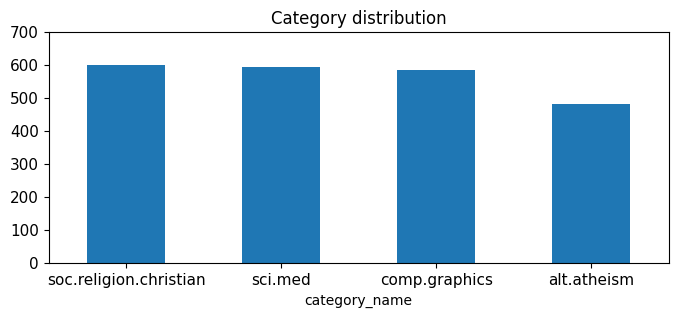

In [10]:
# Import the matplotlib library for creating plots and charts.
import matplotlib.pyplot as plt
# Ensure that the plots are displayed inline
%matplotlib inline
print(X.category_name.value_counts())   # Print the value counts for each category
# plot a barchart of the category distribution for 'X'
X.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 700],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution2'}, xlabel='category_name'>

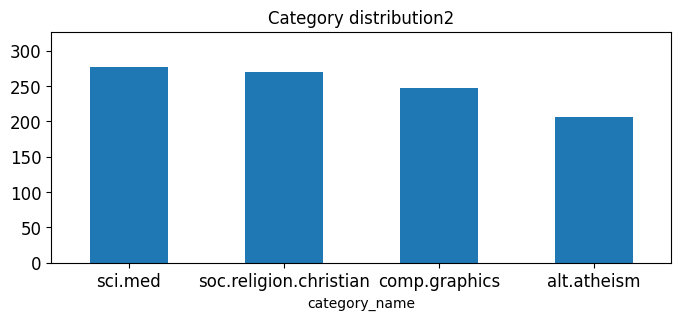

In [11]:
# plot a barchart for 'X_sample'
upper_bound = max(X_sample.category_name.value_counts())+50   # 277 + 50
X_sample.category_name.value_counts().plot(kind = 'bar',
                      title = 'Category distribution2',
                      ylim = [0, upper_bound],
                      rot = 0, fontsize = 12, figsize = (8,3))

#### **Merge two pictures into one:**

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

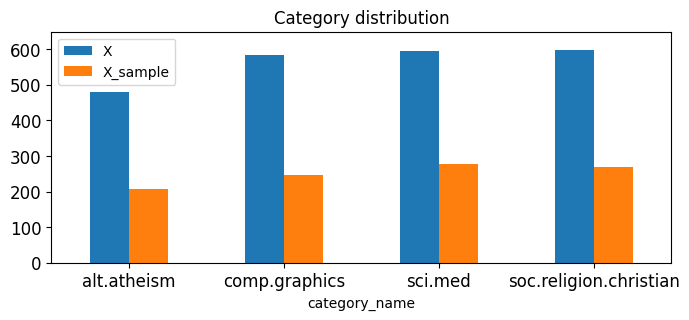

In [12]:
# Create a DataFrame merging 'X' and 'X_sample'
Merge_two_pictures = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()})
upper_bound = max(X.category_name.value_counts())+50   # Calculate the upper y-axis limit
# Plot a bar chart to compare the category distribution between 'X' and 'X_sample'.
Merge_two_pictures.plot(kind='bar',title = 'Category distribution',
                       ylim = [0, upper_bound],
                       rot = 0, fontsize = 12, figsize = (8,3))

In [13]:
import nltk   # Natural Language Toolkit (NLTK) library
nltk.download('punkt')
# Tokenize the 'text' column into 'unigrams'(to store the tokenized words).
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\longy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
from sklearn.feature_extraction.text import CountVectorizer  # for text feature extraction

# Create an instance of CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary from 'text' and return document-term matrix.
analyze = count_vect.build_analyzer()   # Create an 'analyze' function to process text using the learned vocabulary.

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [15]:
# Get the index of the 2nd word in the document-term matrix at row 4
word_index = X_counts[4].indices[1]
print(count_vect.get_feature_names_out()[word_index])  # Print the actual word string for that index

subject


In [16]:
import seaborn as sns   # for data visualization and statistical plotting

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

**In order to effectively visualize the document-term matrix or its sample, I would take the following approaches:**

**Do not directly plot the entire document-term matrix, because the vocabulary size is very large, which would make the matrix very sparse. Therefore, I would randomly sample 300 documents, and to alleviate the sparsity of the matrix, I would only take the top 150 terms with the highest term frequencies.**

**In addition, the original x-axis shows the index of the terms, but we don't know what they represent. Therefore, we should convert the indices to the original terms.**

**This way, we can observe to some extent the most common terms used in each document, but will not be overwhelmed by too much information or too sparse distributions of terms that make insights difficult.**

['3d', 'about', 'ac', 'all', 'also', 'am', 'an', 'and', 'any', 'anyone', 'are', 'article', 'as', 'at', 'available', 'be', 'because', 'been', 'being', 'believe', 'but', 'by', 'ca', 'can', 'christians', 'church', 'com', 'computer', 'could', 'cs', 'do', 'does', 'don', 'edu', 'etc', 'even', 'file', 'files', 'find', 'for', 'from', 'get', 'god', 'good', 'graphics', 'had', 'has', 'have', 'he', 'help', 'here', 'him', 'his', 'host', 'how', 'if', 'image', 'in', 'into', 'is', 'it', 'just', 'keyboard', 'know', 'like', 'lines', 'mail', 'many', 'may', 'me', 'more', 'most', 'must', 'my', 'new', 'nntp', 'no', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'organization', 'other', 'our', 'out', 'people', 'posting', 'pub', 'ray', 're', 'read', 'reply', 'right', 'said', 'say', 'see', 'send', 'she', 'should', 'so', 'some', 'something', 'subject', 'such', 'system', 'than', 'that', 'the', 'their', 'them', 'then', 'there', 'these', 'they', 'things', 'think', 'this', 'those', 'time', 'to', 'two', 'uk', 'unive

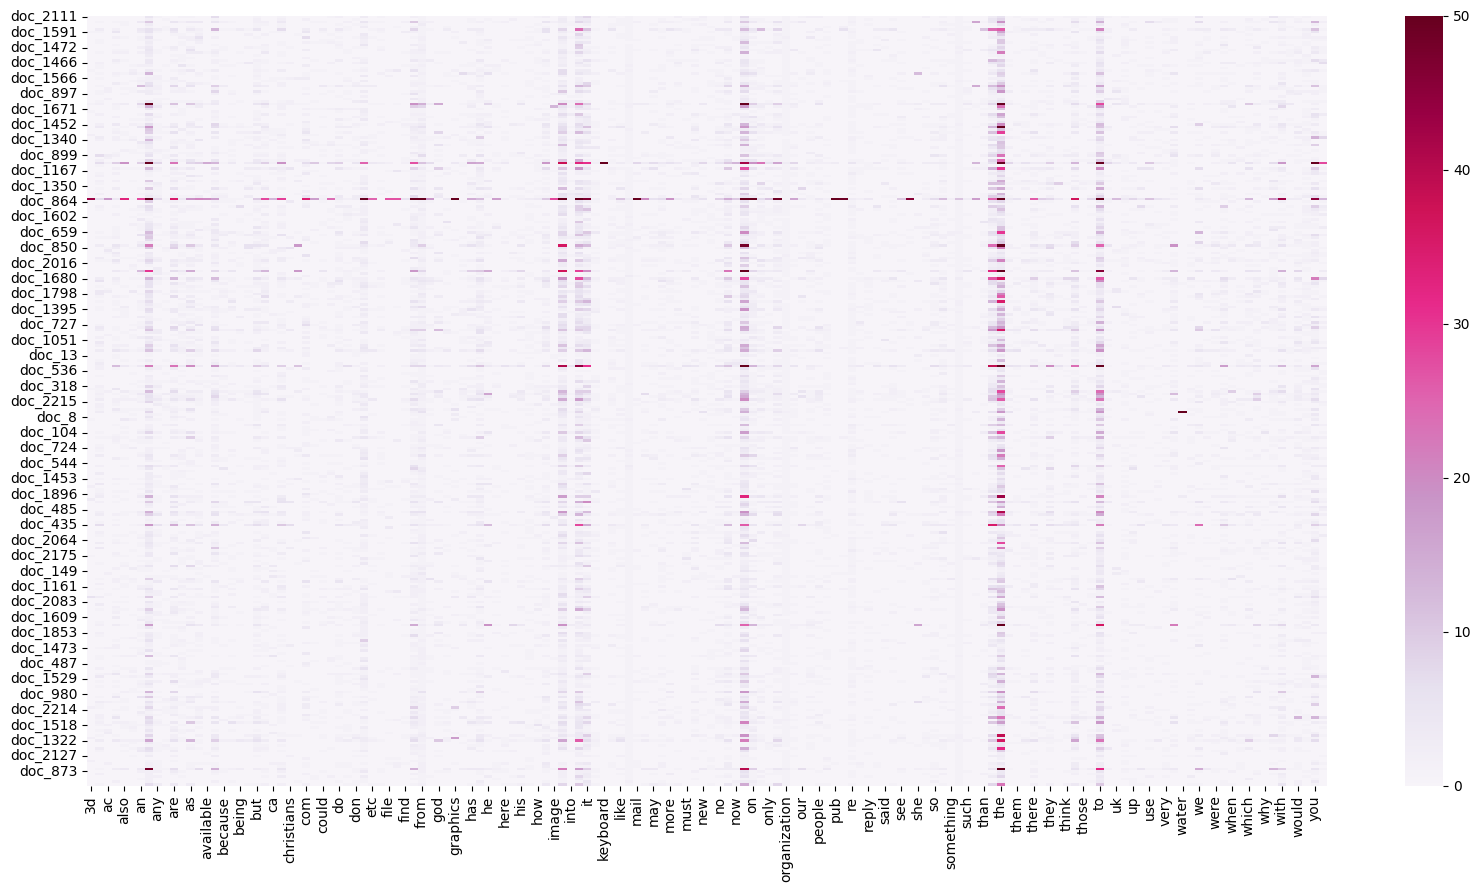

In [17]:
X_sample2 = X.sample(n=300,random_state=52)
count_vect2 = CountVectorizer(max_features=150)
X_counts2 = count_vect2.fit_transform(X_sample2.text)

plot_x = [i for i in count_vect2.get_feature_names_out()]  # Get the feature names (vocabulary)
plot_y = ["doc_"+ str(i) for i in list(X_sample2.index)]  # Create labels for each row
print(plot_x)
plot_z = X_counts2.toarray()  # Convert 'X_counts2'(sparse matrix) to a dense NumPy array 'plot_z'.

# Create a DataFrame 'df_todraw' to visualize the document-term matrix (using Seaborn's heatmap).
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# Draw heatmap using seaborn
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=50)

**Alternatively, we could randomly sample 1000 document samples, and take out the top 2000 most frequent terms from them, sorted by frequency, to make a bar chart with terms on the x-axis and frequencies on the y-axis.**

**Since displaying the distributions of 2000 terms at once would make the terms on the x-axis very small and hard to read, from the resulting chart we can see that the top 100 terms by frequency account for most of the occurrences, while the frequencies of other terms are very low. Therefore, we can focus on the top 100 most frequent terms.**

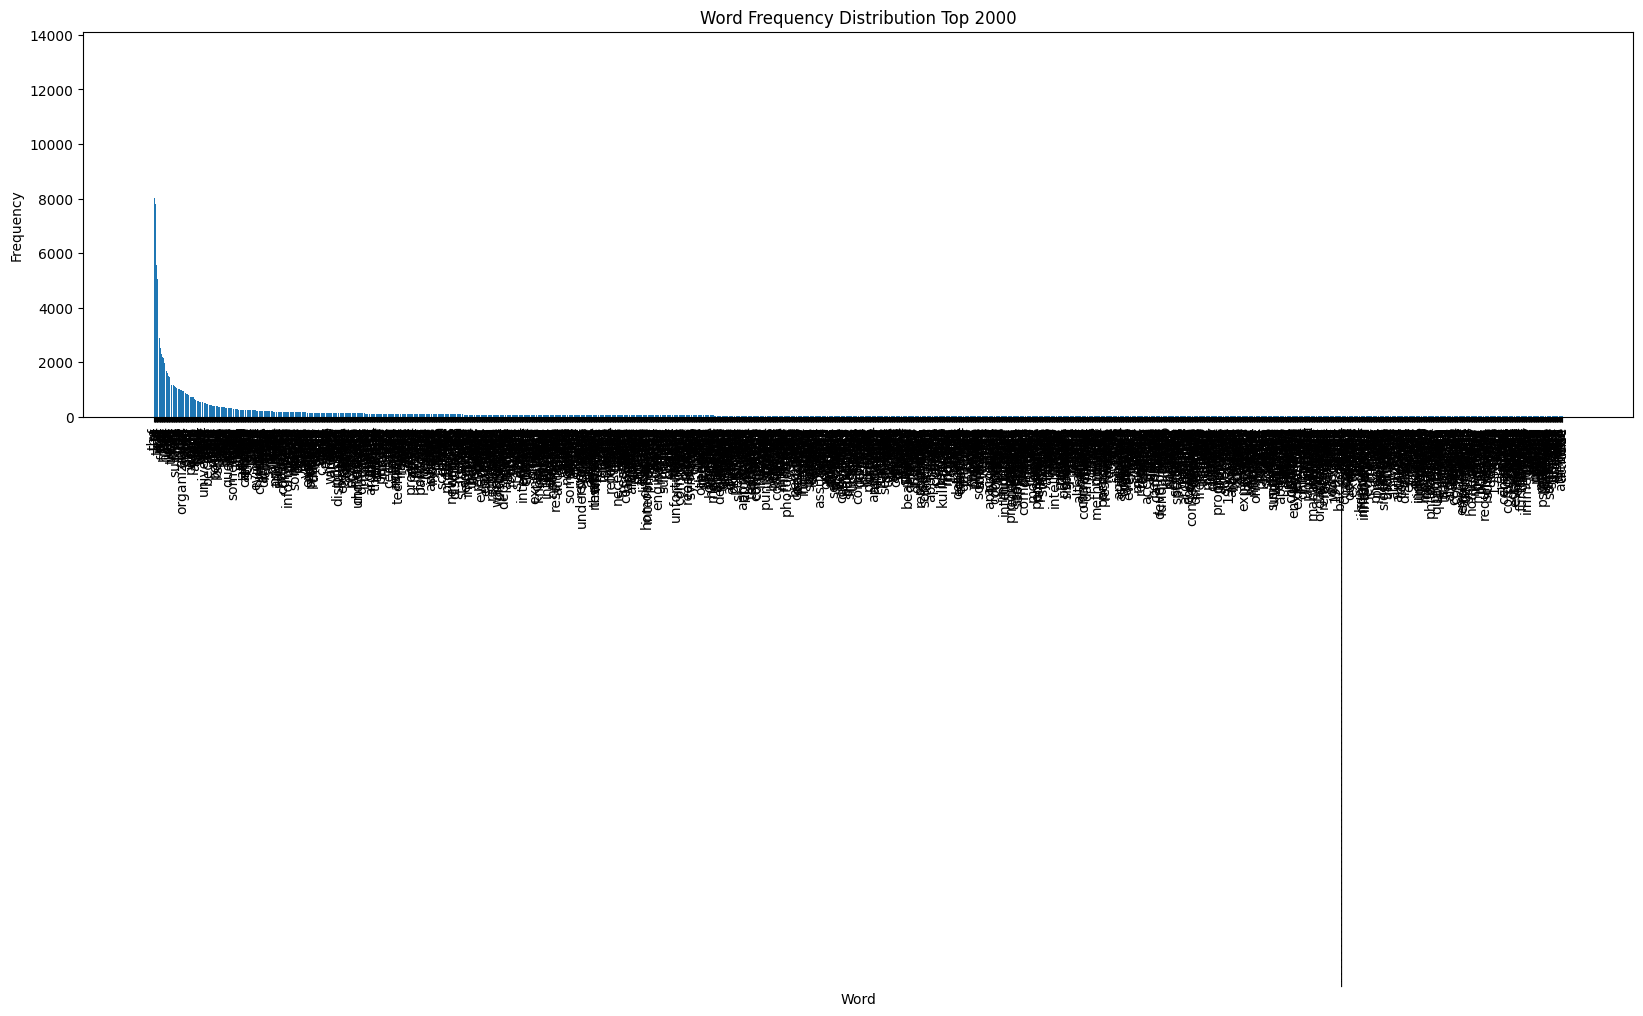

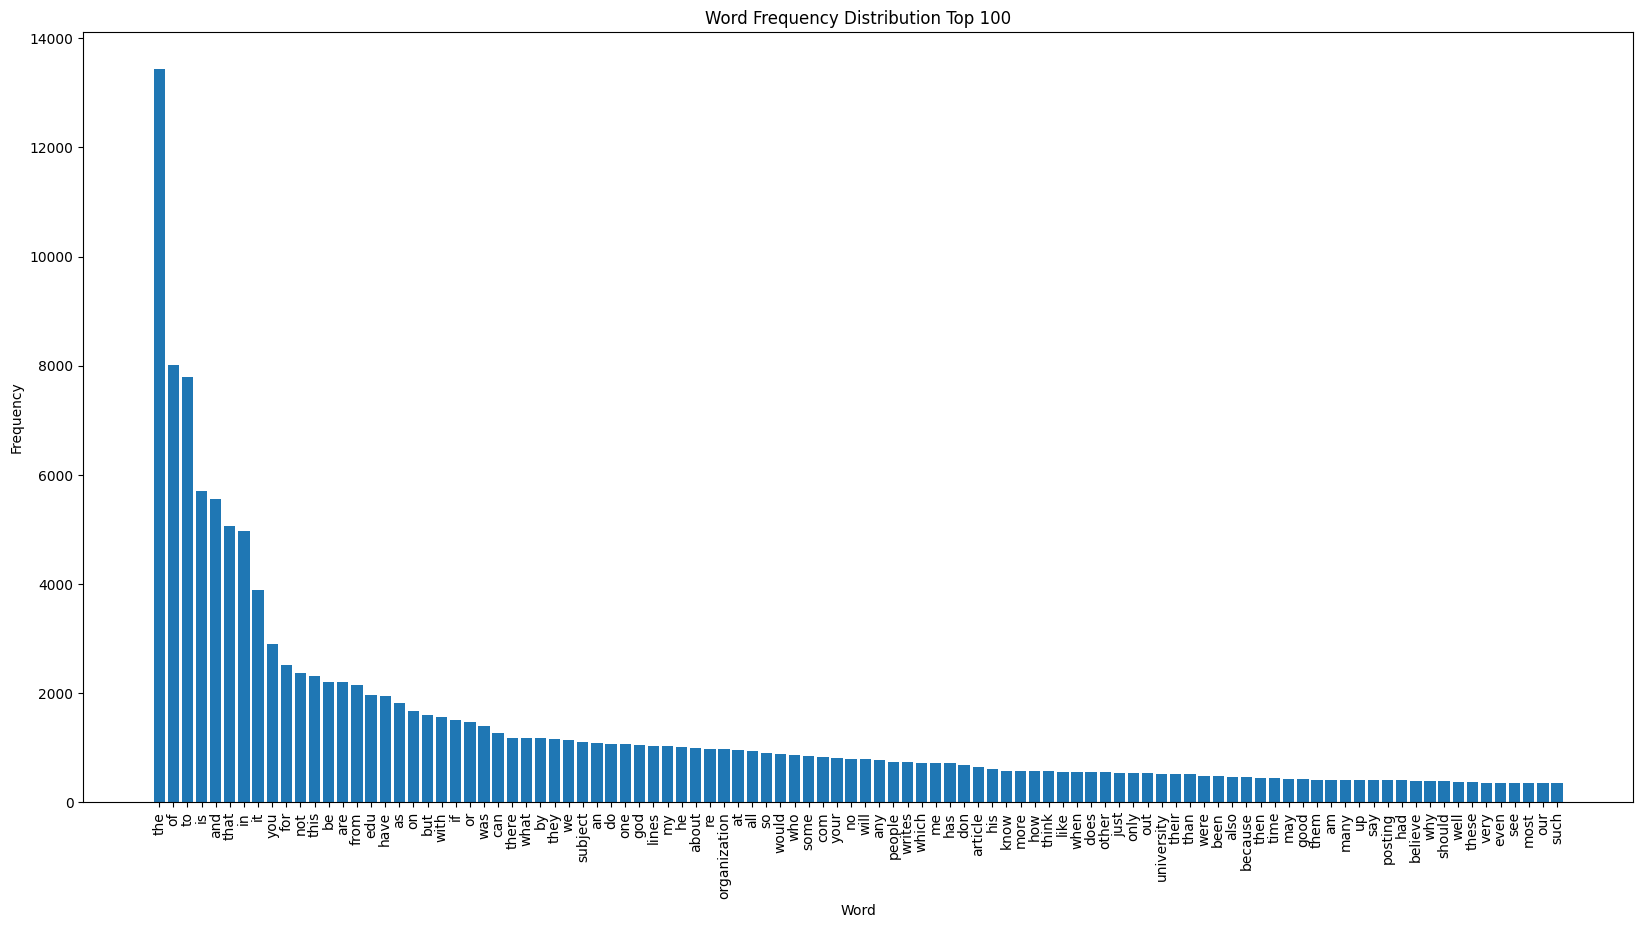

In [18]:
# Create a new DataFrame 'X_sample3' by selecting a random sample of 1000 rows from 'X'
X_sample3 = X.sample(n=1000,random_state=100)
# Create a new instance of CountVectorizer with max 2000 features.
count_vect3 = CountVectorizer(max_features=2000)
# Learn(Transform) the vocabulary from 'text' column in 'X_sample3' and return the document-term matrix 'X_counts3'.
X_counts3 = count_vect3.fit_transform(X_sample3.text)

# Get word frequencies and vocabulary, to create a dictionary mapping words to their frequencies.
word_freq = X_counts3.sum(axis=0).A1
vocabulary = count_vect3.get_feature_names_out()
word_freq_dict = dict(zip(vocabulary, word_freq))
# Sort words by frequency to Extract the top 2000 words.
top_2000_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:]
word_freq = [word_freq_dict[w] for w in top_2000_words]

# Create a bar plot to visualize the word frequency distribution for the top 2000 words.
plt.figure(figsize=(20,5))
plt.bar(top_2000_words, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Top 2000')
plt.show()

# Create a bar plot to visualize the word frequency distribution for the top 100 words.
plt.figure(figsize=(20,10))
plt.bar(top_2000_words[:100], word_freq[:100])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Top 100')
plt.show()

In [19]:
from sklearn.decomposition import PCA

### **>>> Exercise 12 (take home):**
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

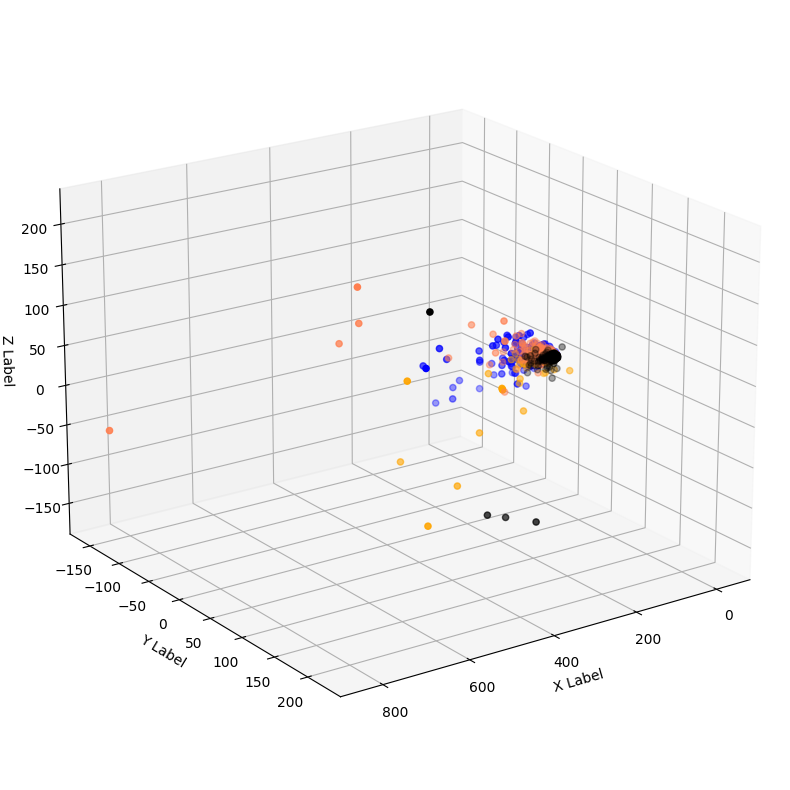

In [20]:
# Reduce dimensions of 'X_counts' to 3 principal components
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
col = ['coral', 'blue', 'black', 'orange']
# Create a 3D scatter plot.
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d')

# Plot each category in separate color
for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(20, 55)
plt.draw()

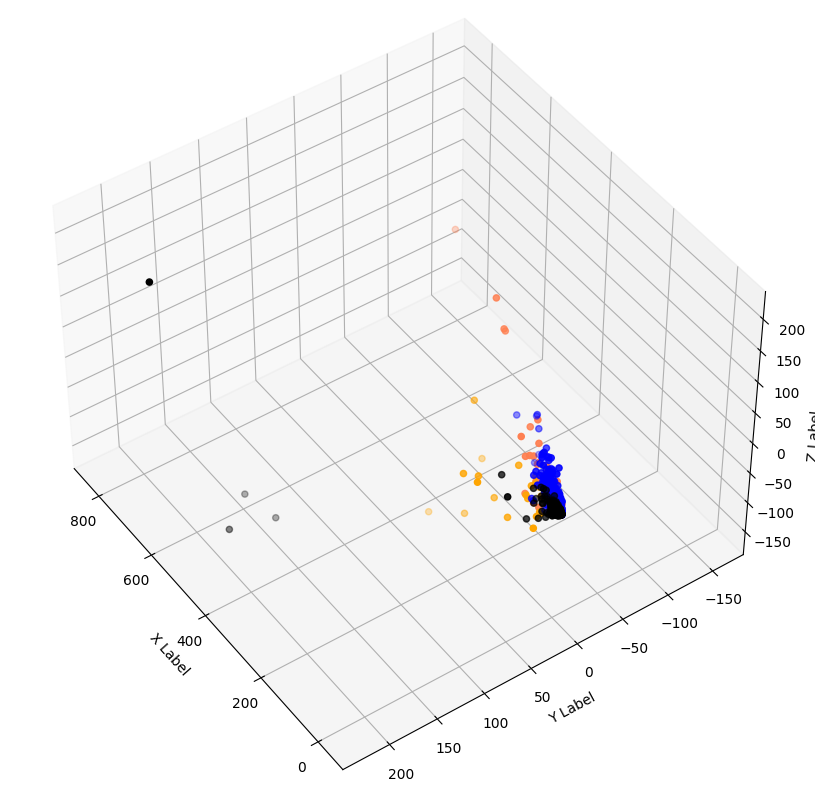

In [21]:
fig2 = plt.figure(figsize=(25, 10))
ax2 = fig2.add_subplot(projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax2.scatter(xs, ys, zs,c = c, marker='o')


ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('X Label')
ax2.set_ylabel('Y Label')
ax2.set_zlabel('Z Label')
ax2.view_init(45, 145) 
plt.draw()

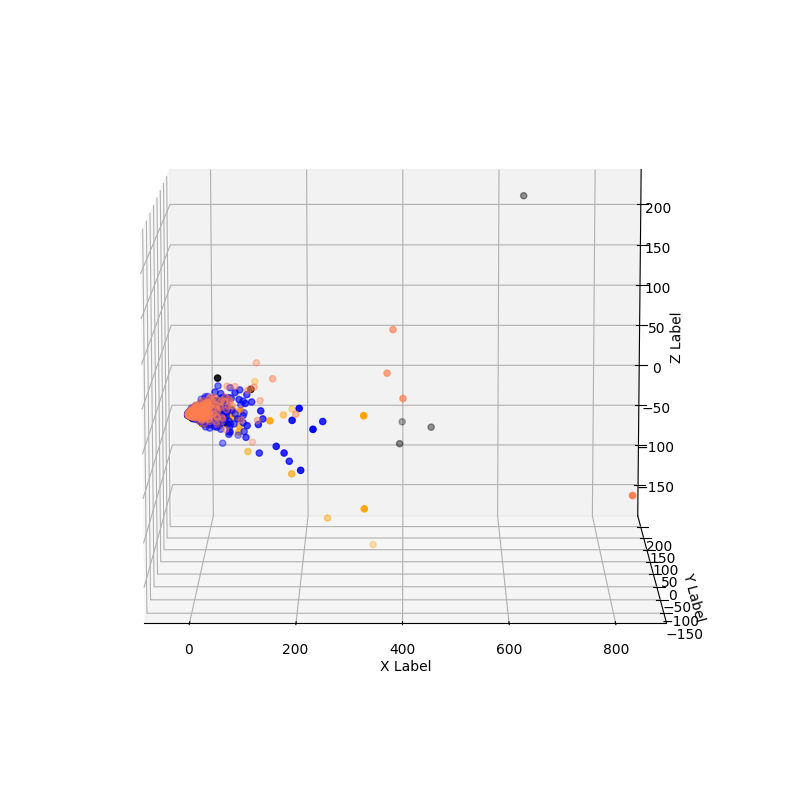

In [22]:
fig3 = plt.figure(figsize=(25, 10))
ax3 = fig3.add_subplot(projection='3d') 

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
    ax3.scatter(xs, ys, zs,c = c, marker='o')


ax3.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax3.set_xlabel('X Label')
ax3.set_ylabel('Y Label')
ax3.set_zlabel('Z Label')
ax3.view_init(10, 270) 
plt.draw()

**From the three graphs above, we can see that even when constructing 3D visualizations on the same dataset, using different angles can lead to different insights. For example, in the first graph we can observe the general distribution of the four categories. The second graph highlights the distribution of the blue and black categories. The third focuses on the distribution of the orange and blue categories.**

**So with the same 3D data, changing view angles allows us to notice different aspects and gain new perspectives.**

In [23]:
term_frequencies = []    # Initialize an empty list
# Calculate term frequencies and append them to the list.
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

C:\Users\longy\AppData\Local\Temp\ipykernel_8164\3385830329.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90); # Rotate x-tick labels vertically to prevent overlap


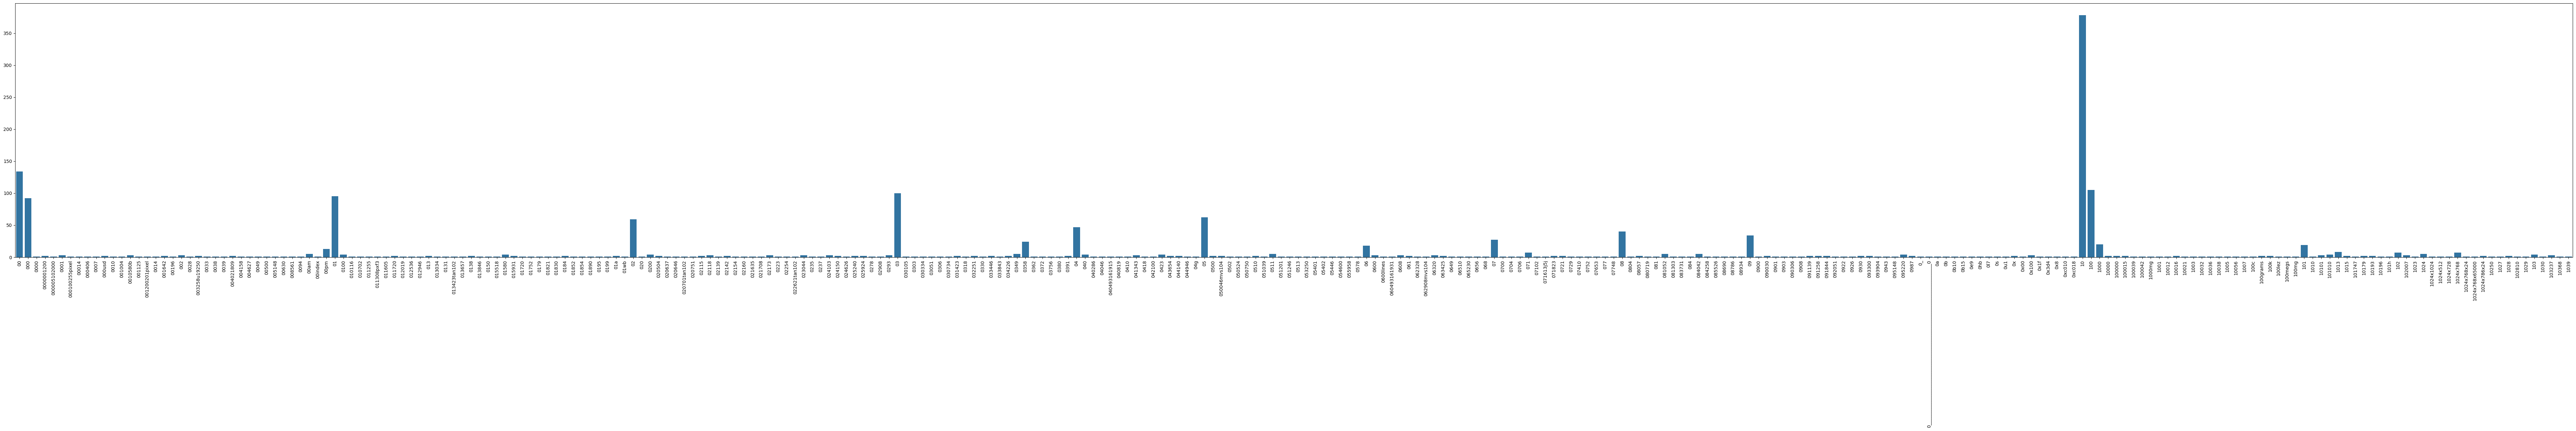

In [24]:
# Plot bar chart of top 300 term frequencies
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90); # Rotate x-tick labels vertically to prevent overlap

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [25]:
import plotly.graph_objects as go   # for interactive data visualizations

term_frequencies = X_counts.sum(axis=0).A1  # Get term frequencies
# Create a plotly figure with a bar chart
fig = go.Figure(data=[
    go.Bar(
        x=count_vect.get_feature_names_out()[:300],
        y=term_frequencies[:300]
    )
])
# Customize the layout of the figure
fig.update_layout(
    title='Word Frequencies',
    xaxis_title='Word',
    yaxis_title='Frequency',
    width=2000,
    height=1000
)

fig.show()

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


<BarContainer object of 59 artists>

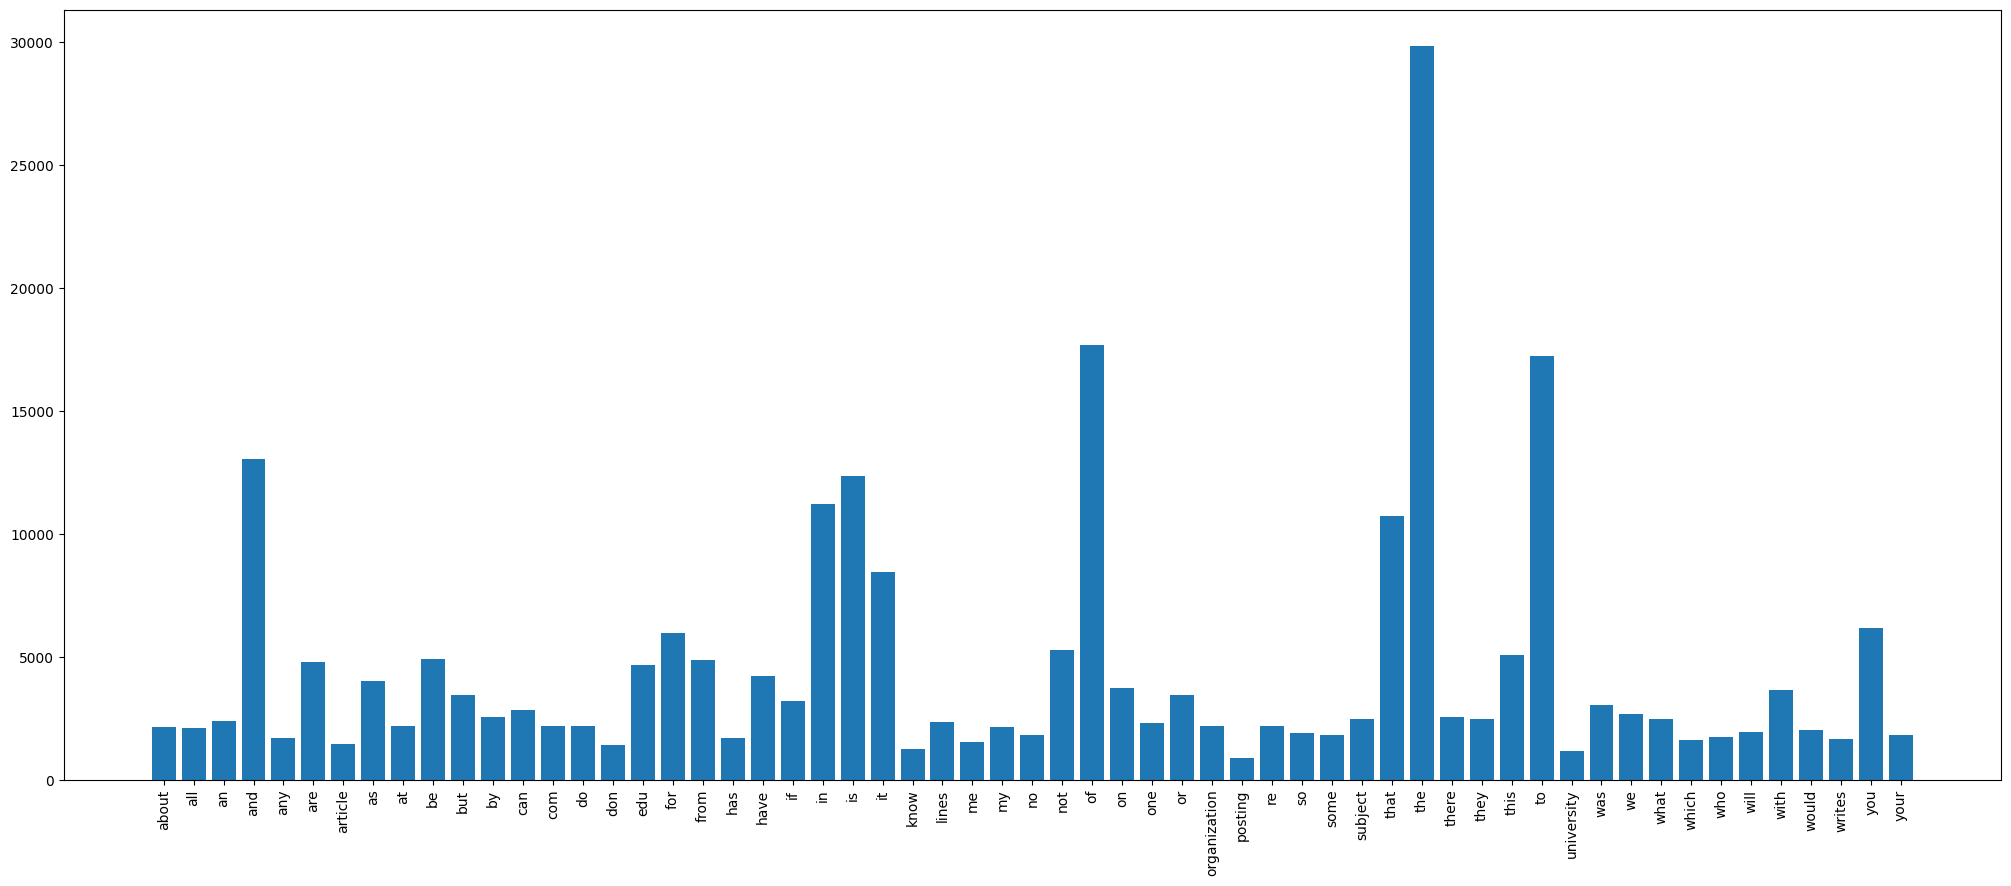

In [26]:
# Set lower feature number
cv = CountVectorizer(max_features=1000) 

# Remove stop words
cv = CountVectorizer(stop_words='english')

# Filter low word frequency
cv = CountVectorizer(min_df=750)

X_counts = cv.fit_transform(X.text)
word_count = X_counts.sum(axis=0).A1

# Get vocabulary list
terms = cv.get_feature_names_out()

# Draw a bar chart
plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.bar(terms, word_count)

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

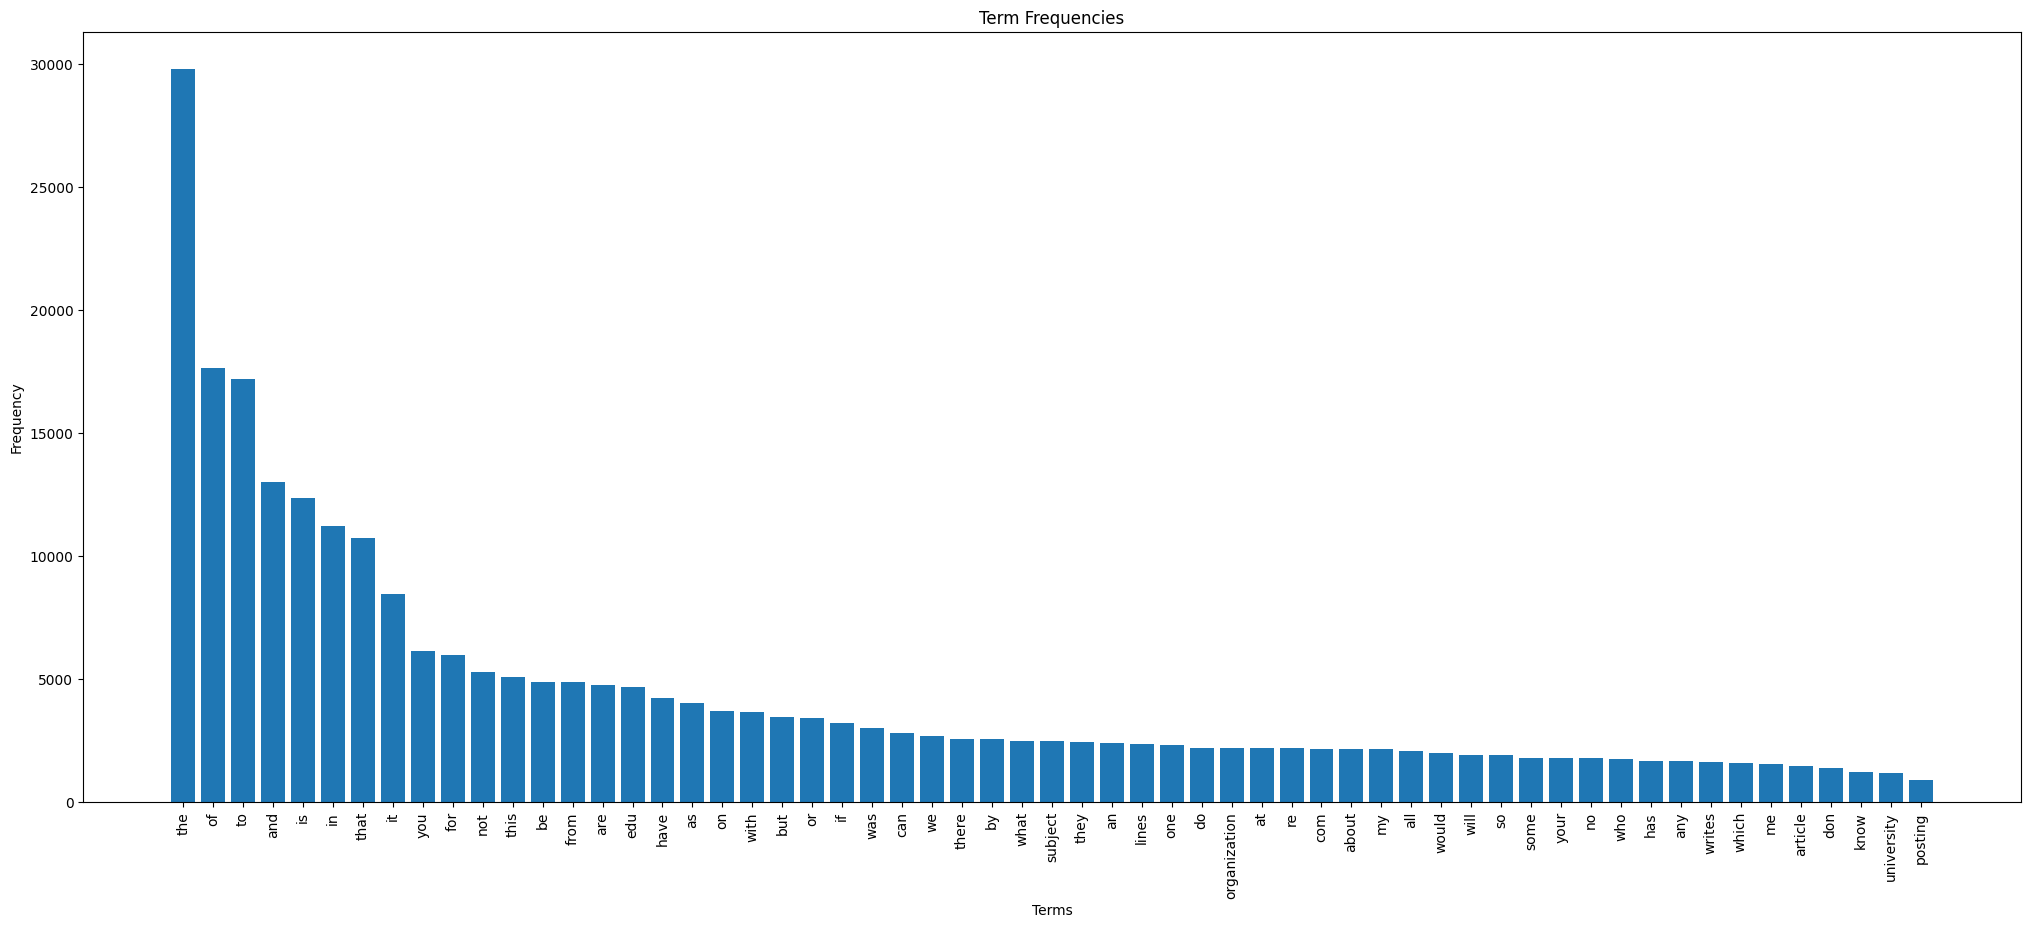

In [27]:
term_frequencies = X_counts.sum(axis=0).A1

term_frequencies_sorted = sorted(term_frequencies, reverse=True)  

indices = np.argsort(term_frequencies)[::-1]

terms_sorted = [terms[i] for i in indices]

plt.figure(figsize=(25, 10))
plt.bar(terms_sorted, term_frequencies_sorted)
plt.xticks(rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency') 
plt.title('Term Frequencies')
plt.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [28]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [29]:
mlb.fit(X.category)
X['bin_category'] = mlb.transform(X['category']).tolist()


In [30]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X['category_name'])  
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
display(X)

text  category  \
0     From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1     From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2     From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3     From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4     From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
...                                                 ...       ...   
2252  From: roos@Operoni.Helsinki.FI (Christophe Roo...         2   
2253  From: mhollowa@ic.sunysb.edu (Michael Holloway...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   

               category_name  \
0              comp.graphics   
1              comp.graphics   
2     soc.religion.christian   
3     soc.religion.christian   
4     soc.religion.christian   
...                      ...   
2252                 sci.med   
2253                 sci.med   
2254                 sci.med   
2255                 sci.med   
2256                 sci.med   

                                               unigrams  bin_category  \
0     [From, :, sd345, @, city.ac.uk, (, Michael, Co...  [0, 1, 0, 0]   
1     [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....  [0, 1, 0, 0]   
2     [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...  [0, 0, 0, 1]   
3     [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...  [0, 0, 0, 1]   
4     [From, :, stanly, @, grok11.columbiasc.ncr.com...  [0, 0, 0, 1]   
...                                                 ...           ...   
2252  [From, :, roos, @, Operoni.Helsinki.FI, (, Chr...  [0, 0, 1, 0]   
2253  [From, :, mhollowa, @, ic.sunysb.edu, (, Micha...  [0, 0, 1, 0]   
2254  [From, :, sasghm, @, theseus.unx.sas.com, (, G...  [0, 0, 1, 0]   
2255  [From, :, Dan, Wallach, <, dwallach, @, cs.ber...  [0, 0, 1, 0]   
2256  [From, :, dyer, @, spdcc.com, (, Steve, Dyer, ...  [0, 0, 1, 0]   

     bin_category_name  
0         [0, 1, 0, 0]  
1         [0, 1, 0, 0]  
2         [0, 0, 0, 1]  
3         [0, 0, 0, 1]  
4         [0, 0, 0, 1]  
...                ...  
2252      [0, 0, 1, 0]  
2253      [0, 0, 1, 0]  
2254      [0, 0, 1, 0]  
2255      [0, 0, 1, 0]  
2256      [0, 0, 1, 0]  

[2257 rows x 6 columns]

Yes, generate the binarization using the `category_name` column instead can work

## Part two- follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**.

### 1. Data Preparation

In [31]:
import os
here = os.path.dirname(__file__) if "__file__" in locals() else "."


files = [("amazon", os.path.join(here, "sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt")),
         ("imdb", os.path.join(here, "sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt")),
         ("yelp", os.path.join(here, "sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt"))]
dfs = [] 
score=["negative", "positive"]
for provider, name in files:
    df = pd.read_csv(name,  sep="\t", header=None)
    df.columns = ["sentance", "label"]
    df["provider"] = provider
    dfs.append(df)
    
data = pd.concat(dfs, axis=0,ignore_index=True)

data['sentiment'] = data.label.apply(lambda t: score[t])
display(data)
print("shape", data.shape)

sentance  label provider  \
0     So there is no way for me to plug it in here i...      0   amazon   
1                           Good case, Excellent value.      1   amazon   
2                                Great for the jawbone.      1   amazon   
3     Tied to charger for conversations lasting more...      0   amazon   
4                                     The mic is great.      1   amazon   
...                                                 ...    ...      ...   
2743  I think food should have flavor and texture an...      0     yelp   
2744                           Appetite instantly gone.      0     yelp   
2745  Overall I was not impressed and would not go b...      0     yelp   
2746  The whole experience was underwhelming, and I ...      0     yelp   
2747  Then, as if I hadn't wasted enough of my life ...      0     yelp   

     sentiment  
0     negative  
1     positive  
2     positive  
3     negative  
4     positive  
...        ...  
2743  negative  
2744  negative  
2745  negative  
2746  negative  
2747  negative  

[2748 rows x 4 columns]

shape (2748, 4)


## 2. Dealing with Missing Values and Duplicate Data

In [32]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)


data.isnull().apply(lambda x: check_missing_values(x))  #check missing value
print(sum(data.duplicated('sentance')))    #check duplicated data
data.drop_duplicates(inplace=True,ignore_index=True)         #delete duplicated data
print("shape", data.shape)

17
shape (2731, 4)


## 3.  Data Preprocessing

### 3.1 Sampling

In [33]:
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)

sentance  label provider  \
999   Loved the casting of Jimmy Buffet as the scien...      1     imdb   
2028  I live in the neighborhood so I am disappointe...      0     yelp   
1494                 DELETE this film from your mind!        0     imdb   
941           Very much disappointed with this company.      0   amazon   
73               Nice docking station for home or work.      1   amazon   
...                                                 ...    ...      ...   
1985                  Owner's are really great people.!      1     yelp   
1666  I do not know if this was Emilio Estevez's dir...      1     imdb   
2464         As for the service, I thought it was good.      1     yelp   
2643  i felt insulted and disrespected, how could yo...      0     yelp   
1909  Everything on the menu is terrific and we were...      1     yelp   

     sentiment  
999   positive  
2028  negative  
1494  negative  
941   negative  
73    positive  
...        ...  
1985  positive  
1666  positive  
2464  positive  
2643  negative  
1909  positive  

[1000 rows x 4 columns]

Let's do something cool here while we are working with sampling! Let us look at the distribution of categories in both the sample and original dataset. Let us visualize and analyze the disparity between the two datasets. To generate some visualizations, we are going to use `matplotlib` python library. With matplotlib, things are faster and compatability-wise it may just be the best visualization library for visualizing content extracted from dataframes and when using Jupyter notebooks. Let's take a loot at the magic of `matplotlib` below.

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

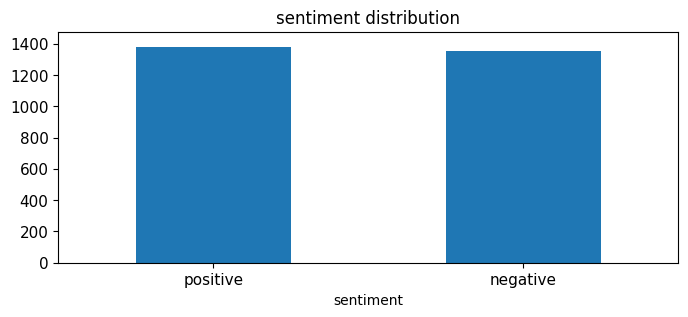

In [34]:
upper_bound1 = max(data.sentiment.value_counts() + 100)
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0,upper_bound1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

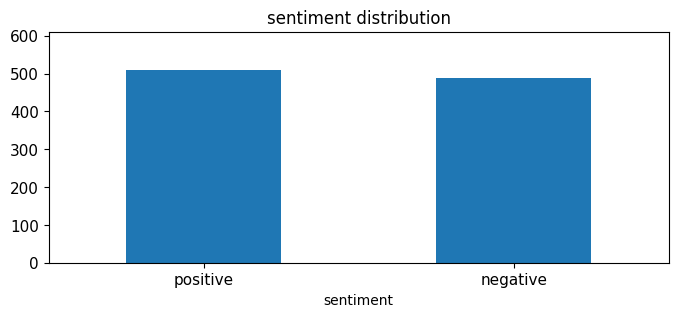

In [35]:
upper_bound2 = max(data_sample.sentiment.value_counts() + 100)
data_sample.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0,upper_bound2],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

<Axes: title={'center': 'Category distribution'}, xlabel='sentiment'>

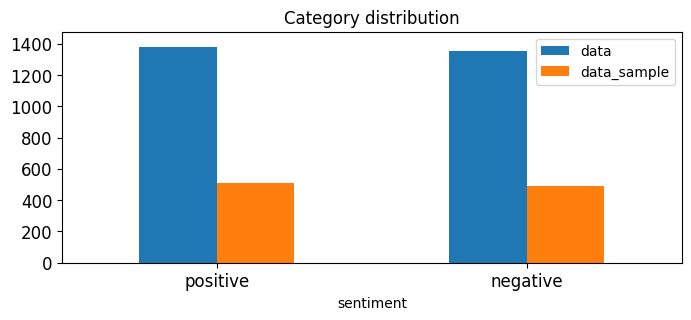

In [36]:
Merge_data_and_sample = pd.DataFrame({'data': data.sentiment.value_counts(), 'data_sample': data_sample.sentiment.value_counts()}) 
upper_bound3 = max(data.sentiment.value_counts()+100)

Merge_data_and_sample.plot(kind='bar',title = 'Category distribution',
                                           ylim = [0, upper_bound3], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### 3.2 Feature Creation

In [37]:
data['unigrams'] = data['sentance'].apply(lambda x: dmh.tokenize_text(x))
display(data)

sentance  label provider  \
0     So there is no way for me to plug it in here i...      0   amazon   
1                           Good case, Excellent value.      1   amazon   
2                                Great for the jawbone.      1   amazon   
3     Tied to charger for conversations lasting more...      0   amazon   
4                                     The mic is great.      1   amazon   
...                                                 ...    ...      ...   
2726  I think food should have flavor and texture an...      0     yelp   
2727                           Appetite instantly gone.      0     yelp   
2728  Overall I was not impressed and would not go b...      0     yelp   
2729  The whole experience was underwhelming, and I ...      0     yelp   
2730  Then, as if I hadn't wasted enough of my life ...      0     yelp   

     sentiment                                           unigrams  
0     negative  [So, there, is, no, way, for, me, to, plug, it...  
1     positive               [Good, case, ,, Excellent, value, .]  
2     positive                      [Great, for, the, jawbone, .]  
3     negative  [Tied, to, charger, for, conversations, lastin...  
4     positive                           [The, mic, is, great, .]  
...        ...                                                ...  
2726  negative  [I, think, food, should, have, flavor, and, te...  
2727  negative                     [Appetite, instantly, gone, .]  
2728  negative  [Overall, I, was, not, impressed, and, would, ...  
2729  negative  [The, whole, experience, was, underwhelming, ,...  
2730  negative  [Then, ,, as, if, I, had, n't, wasted, enough,...  

[2731 rows x 5 columns]

### 3.3 Feature subset selection

In [38]:
count_vect = CountVectorizer()
#print(data.sentance)
data_counts = count_vect.fit_transform(data.sentance) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
#print(data_counts[0])
print(count_vect.get_feature_names_out()[4161])
analyze = count_vect.build_analyzer()
analyze(data.sentance[0])
data_counts[0:5,0:100].toarray()
word_index = data_counts[4].indices[1]
print(count_vect.get_feature_names_out()[word_index])


(2731, 5155)
so
the


['term_00', 'term_10', 'term_100', 'term_11', 'term_12', 'term_13', 'term_15', 'term_15g', 'term_15pm', 'term_17', 'term_18', 'term_18th', 'term_1928', 'term_1947', 'term_1948', 'term_1949', 'term_1971', 'term_1973', 'term_1979', 'term_1980']
['sent_0', 'sent_1', 'sent_2', 'sent_3', 'sent_4', 'sent_5', 'sent_6', 'sent_7', 'sent_8', 'sent_9', 'sent_10', 'sent_11', 'sent_12', 'sent_13', 'sent_14', 'sent_15', 'sent_16', 'sent_17', 'sent_18', 'sent_19']


term_00  term_10  term_100  term_11  term_12  term_13  term_15  \
sent_0         0        0         0        0        1        0        0   
sent_1         0        0         0        0        3        0        0   
sent_2         1        0         2        9        1        6        0   
sent_3         1        0         0        1        0        0        0   
sent_4         0        0         0        3        0        2        2   
sent_5         0        2         0        7        0        3        1   
sent_6         1        0         0        7        0        5        1   
sent_7         1        0         3        9        4        3        0   
sent_8         0        0         0        5        0        3        2   
sent_9         6        0         1       23        0        0        0   
sent_10        1        2         4       15        2        3        2   
sent_11        0        0         0        2        0        2        0   
sent_12        4        3         8       13        2        1        1   
sent_13        0        1         0        1        0        0        0   
sent_14        1        1         0        4        0        0        1   
sent_15        0        0         0        1        0        0        0   
sent_16        0        0         1        3        0        0        1   
sent_17        0        2         0        0        0        0        0   
sent_18        0        0         0        3        2        0        0   
sent_19        0        0         0        0        2        0        1   

         term_15g  term_15pm  term_17  term_18  term_18th  term_1928  \
sent_0          0          0        0        0          0          0   
sent_1          1          0        4        0          1          2   
sent_2          0          7        8        1          0          4   
sent_3          0          1        0        0          0          1   
sent_4          2          1        0        0          0          0   
sent_5          3          1       12        0          1          0   
sent_6          4          1        3        1          0          2   
sent_7          4          2        5        4          0          1   
sent_8          0          0        0        1          0          0   
sent_9          3          2        1        3          0          0   
sent_10         9          2        4        4          5          6   
sent_11         0          1        0        0          0          0   
sent_12         7          2        7       12          3          7   
sent_13         1          1        1        0          0          0   
sent_14         0          2        0        1          0          0   
sent_15         2          0        1        0          0          2   
sent_16         1          0        1        1          0          3   
sent_17         0          0        1        0          0          0   
sent_18         0          2        1        0          0          0   
sent_19         0          0        3        0          1          0   

         term_1947  term_1948  term_1949  term_1971  term_1973  term_1979  \
sent_0           0          1          0          0          0          1   
sent_1           0          0          0          1          2          1   
sent_2           0          5          1          2          6          2   
sent_3           0          0          0          0          1          1   
sent_4           2          0          0          2          2          1   
sent_5           0          0          0          2          0          1   
sent_6           1          0          2          2          5          2   
sent_7           1          1          1          0          1          4   
sent_8           0          0          0          6          0          1   
sent_9           0          1          2          2          3          1   
sent_10          1          6          1          3          7          1

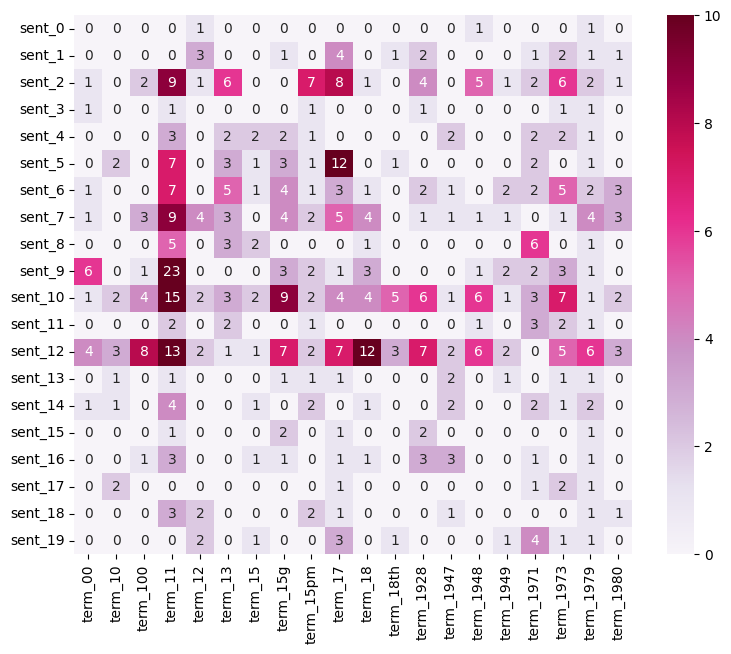

In [39]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
print(plot_x)
plot_y = ["sent_"+ str(i) for i in list(X.index)[0:20]]
print(plot_y)
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=10, annot=True)

['10', 'about', 'acting', 'after', 'all', 'also', 'am', 'an', 'and', 'any', 'are', 'area', 'as', 'at', 'back', 'bad', 'battery', 'be', 'before', 'best', 'better', 'between', 'big', 'black', 'both', 'buffet', 'but', 'by', 'camera', 'can', 'characters', 'could', 'did', 'didn', 'do', 'does', 'don', 'even', 'ever', 'everything', 'excellent', 'expect', 'film', 'food', 'for', 'from', 'get', 'go', 'going', 'good', 'great', 'had', 'has', 'have', 'he', 'headset', 'here', 'how', 'if', 'impressed', 'in', 'is', 'it', 'its', 'just', 'know', 'like', 'line', 'little', 'lots', 'love', 'made', 'make', 'many', 'me', 'more', 'movie', 'movies', 'much', 'my', 'nice', 'not', 'now', 'of', 'on', 'one', 'only', 'or', 'other', 'our', 'out', 'over', 'phone', 'place', 'play', 'poor', 'pretty', 'price', 'product', 'quality', 'quite', 'really', 'reception', 'recommend', 'right', 'screen', 'script', 'see', 'seen', 'service', 'show', 'so', 'some', 'sound', 'stupid', 'terrible', 'than', 'that', 'the', 'their', 'them',

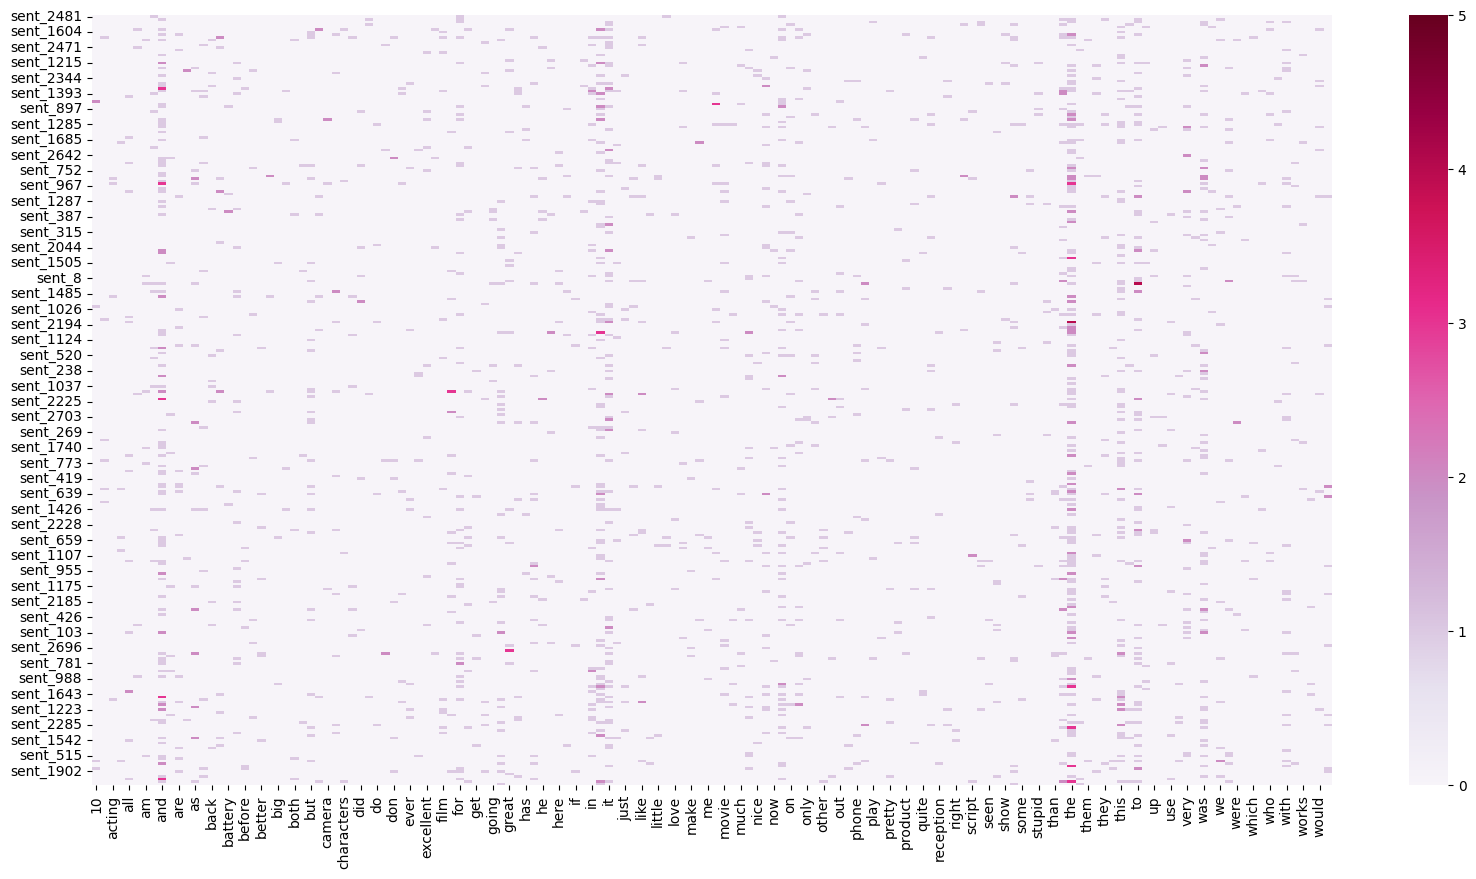

In [40]:
data_sample2 = data.sample(n=300,random_state=52)
count_vect2 = CountVectorizer(max_features=150) 
data_counts2 = count_vect2.fit_transform(data_sample2.sentance)

plot_x = [i for i in count_vect2.get_feature_names_out()]
plot_y = ["sent_"+ str(i) for i in list(data_sample2.index)]
print(plot_x)
plot_z = data_counts2.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.figure(figsize=(20,10))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=5)

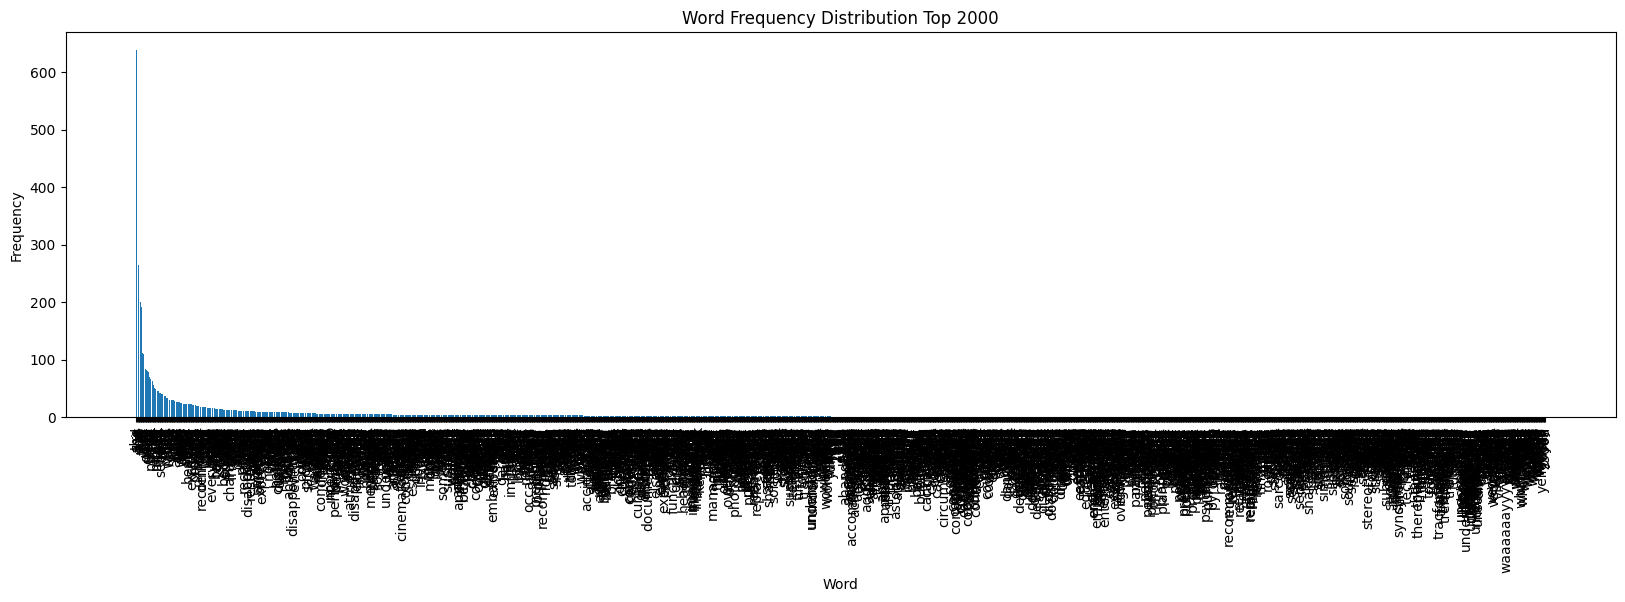

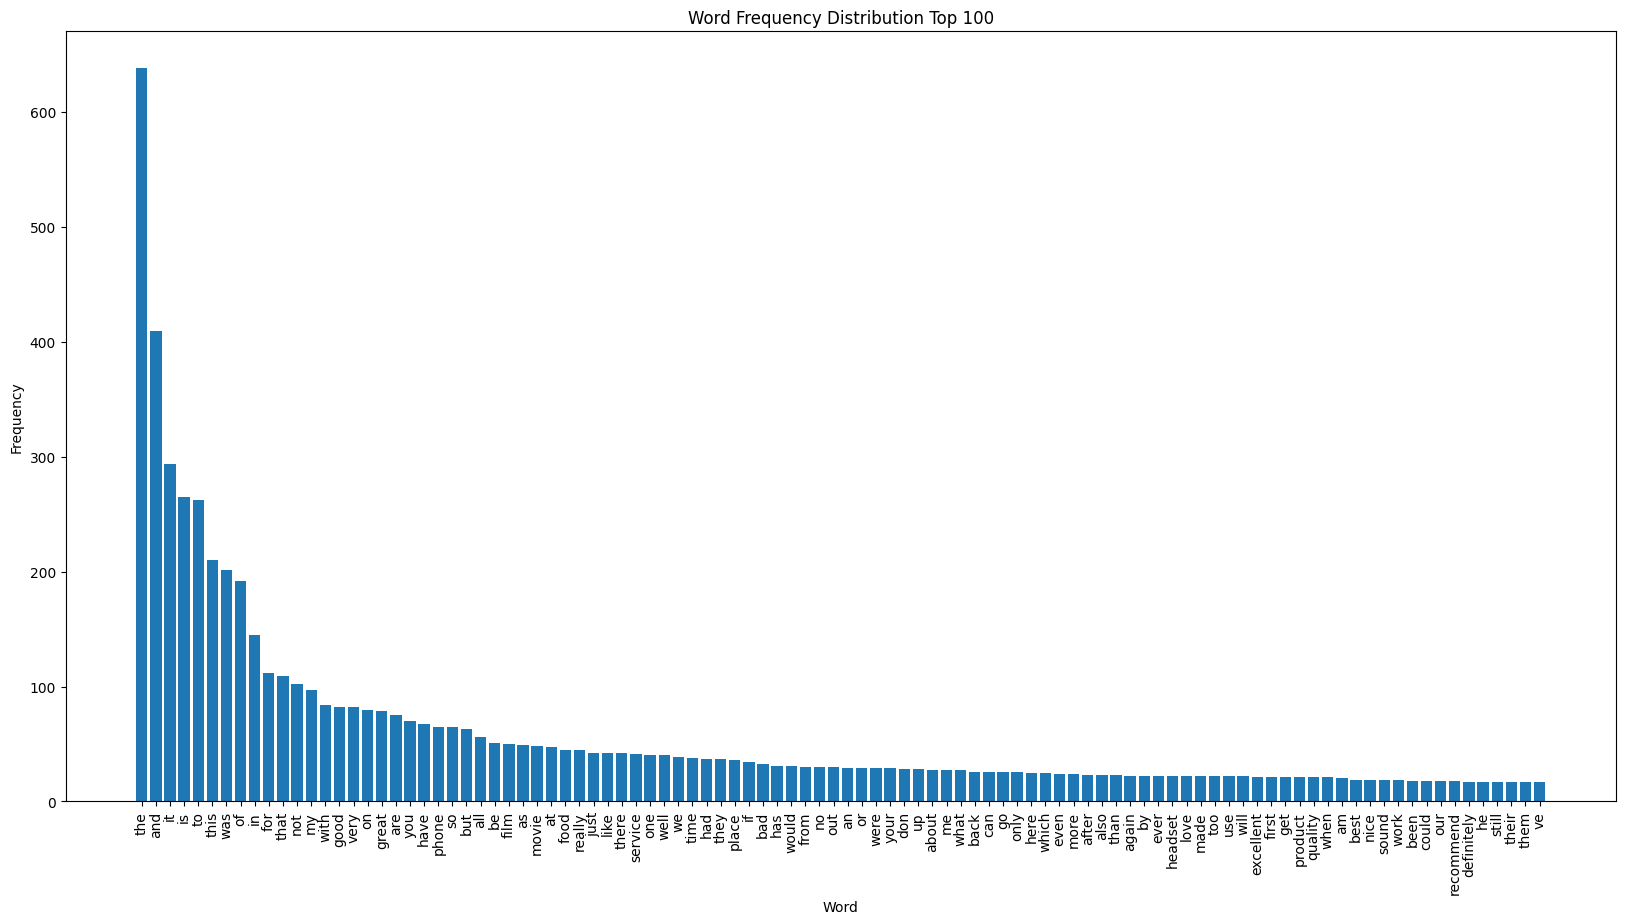

In [41]:
data_sample3 = data.sample(n=1000,random_state=100)

count_vect3 = CountVectorizer(max_features=2000) 
data_counts3 = count_vect3.fit_transform(data_sample3.sentance)

word_freq = data_counts3.sum(axis=0).A1
vocabulary = count_vect3.get_feature_names_out()
word_freq_dict = dict(zip(vocabulary, word_freq)) 
top_2000_words = sorted(word_freq_dict, key=word_freq_dict.get, reverse=True)[:]
word_freq = [word_freq_dict[w] for w in top_2000_words]


plt.figure(figsize=(20,5))
plt.bar(top_2000_words, word_freq)
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Top 2000')
plt.show()
plt.figure(figsize=(20,10))
plt.bar(top_2000_words[:100], word_freq[:100])
plt.xticks(rotation=90)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Word Frequency Distribution Top 100')
plt.show()

### 3.4 Dimensionality Reduction

2D visualization

In [42]:
print(data_counts.shape)
data_reduced = PCA(n_components = 2).fit_transform(data_counts.toarray())
print(data_reduced.shape)

(2731, 5155)
(2731, 2)


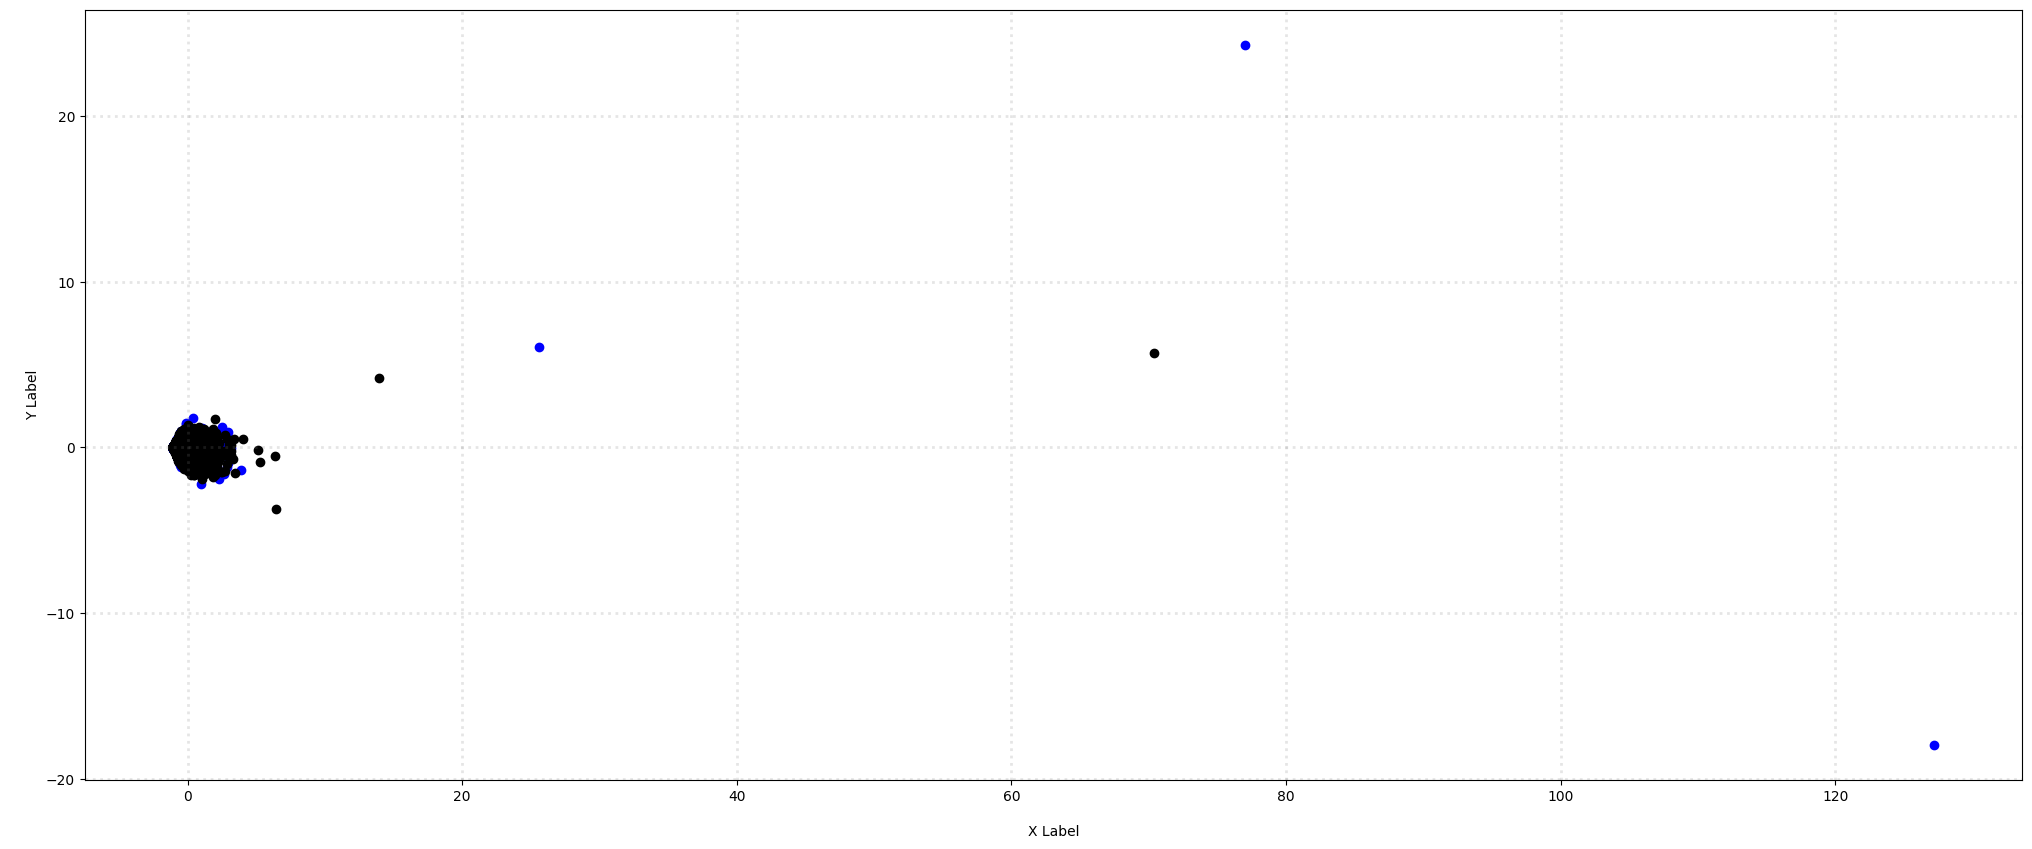

In [43]:
col = [ 'blue', 'black']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score_sentiment	 in zip(col, score):
    xs = data_reduced[data['sentiment'] == score_sentiment].T[0]
    ys = data_reduced[data['sentiment'] == score_sentiment].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

3D visualization

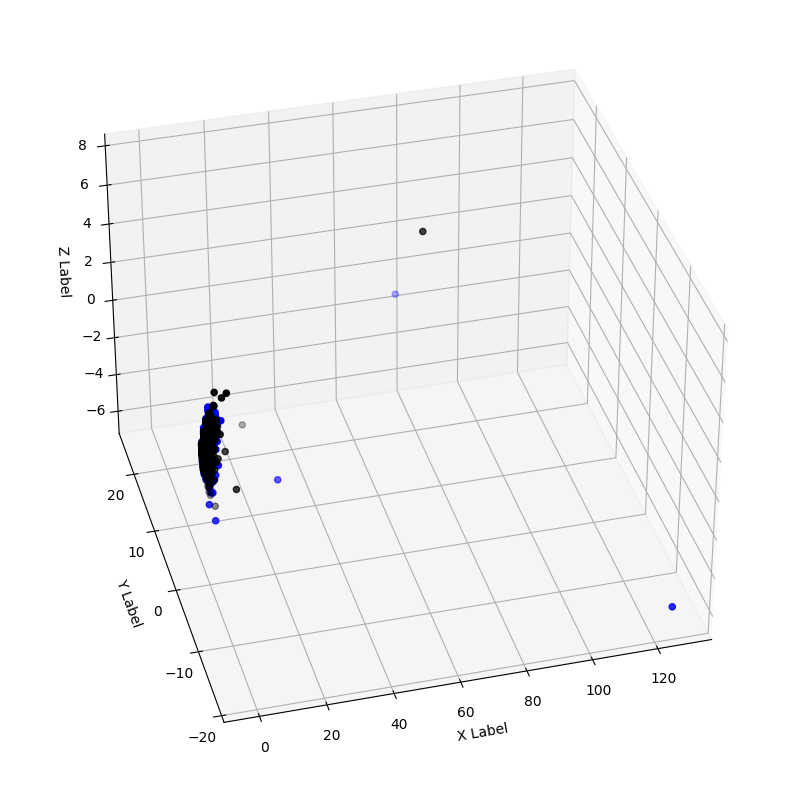

In [44]:
data_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
data_reduced.shape
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d') 

for c, score_sentiment	 in zip(col, score):
    xs = data_reduced[data['sentiment'] == score_sentiment].T[0]
    ys = data_reduced[data['sentiment'] == score_sentiment].T[1]
    zs = data_reduced[data['sentiment'] == score_sentiment].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(35, 255) 
plt.draw()

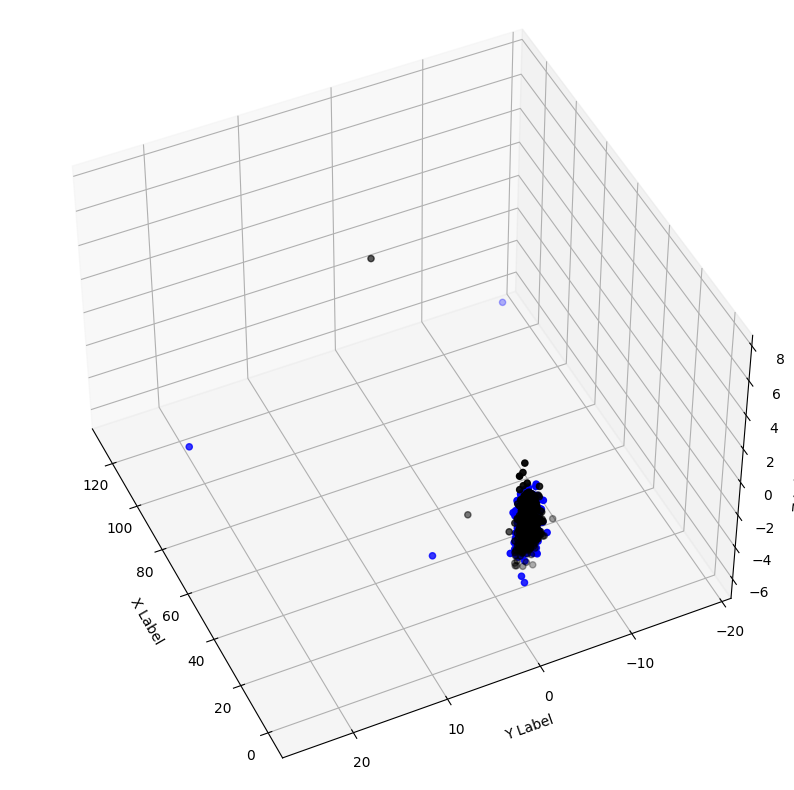

In [45]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d') 

for c, score_sentiment	 in zip(col, score):
    xs = data_reduced[data['sentiment'] == score_sentiment].T[0]
    ys = data_reduced[data['sentiment'] == score_sentiment].T[1]
    zs = data_reduced[data['sentiment'] == score_sentiment].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(45, 155) 
plt.draw()

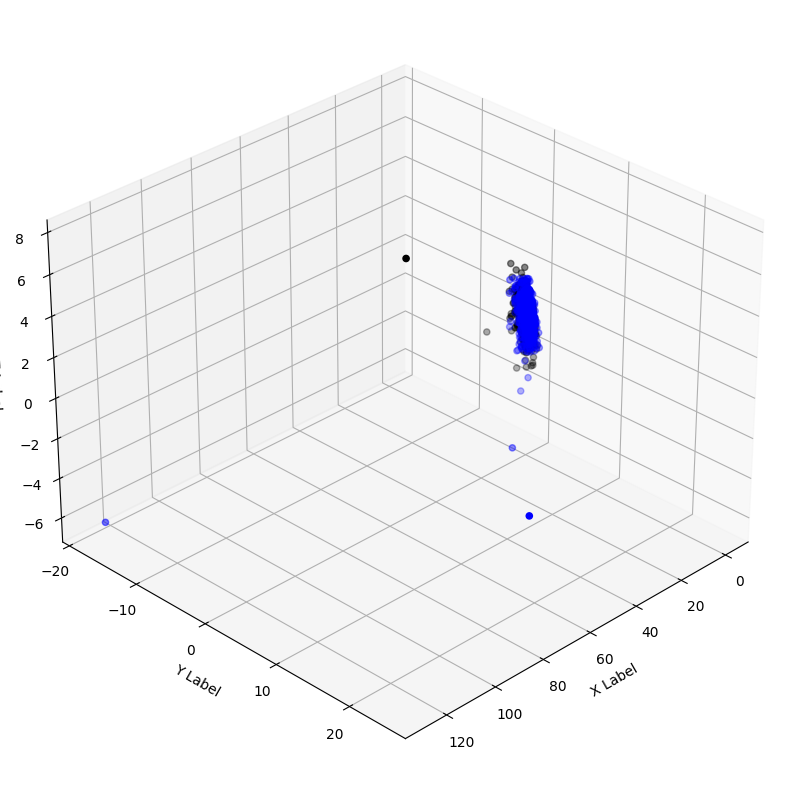

In [46]:
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(projection='3d') 

for c, score_sentiment	 in zip(col, score):
    xs = data_reduced[data['sentiment'] == score_sentiment].T[0]
    ys = data_reduced[data['sentiment'] == score_sentiment].T[1]
    zs = data_reduced[data['sentiment'] == score_sentiment].T[2]
    ax.scatter(xs, ys, zs,c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(30, 45) 
plt.draw()

### 3.5 Attribute Transformation / Aggregation

5155


C:\Users\longy\AppData\Local\Temp\ipykernel_8164\3195018396.py:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



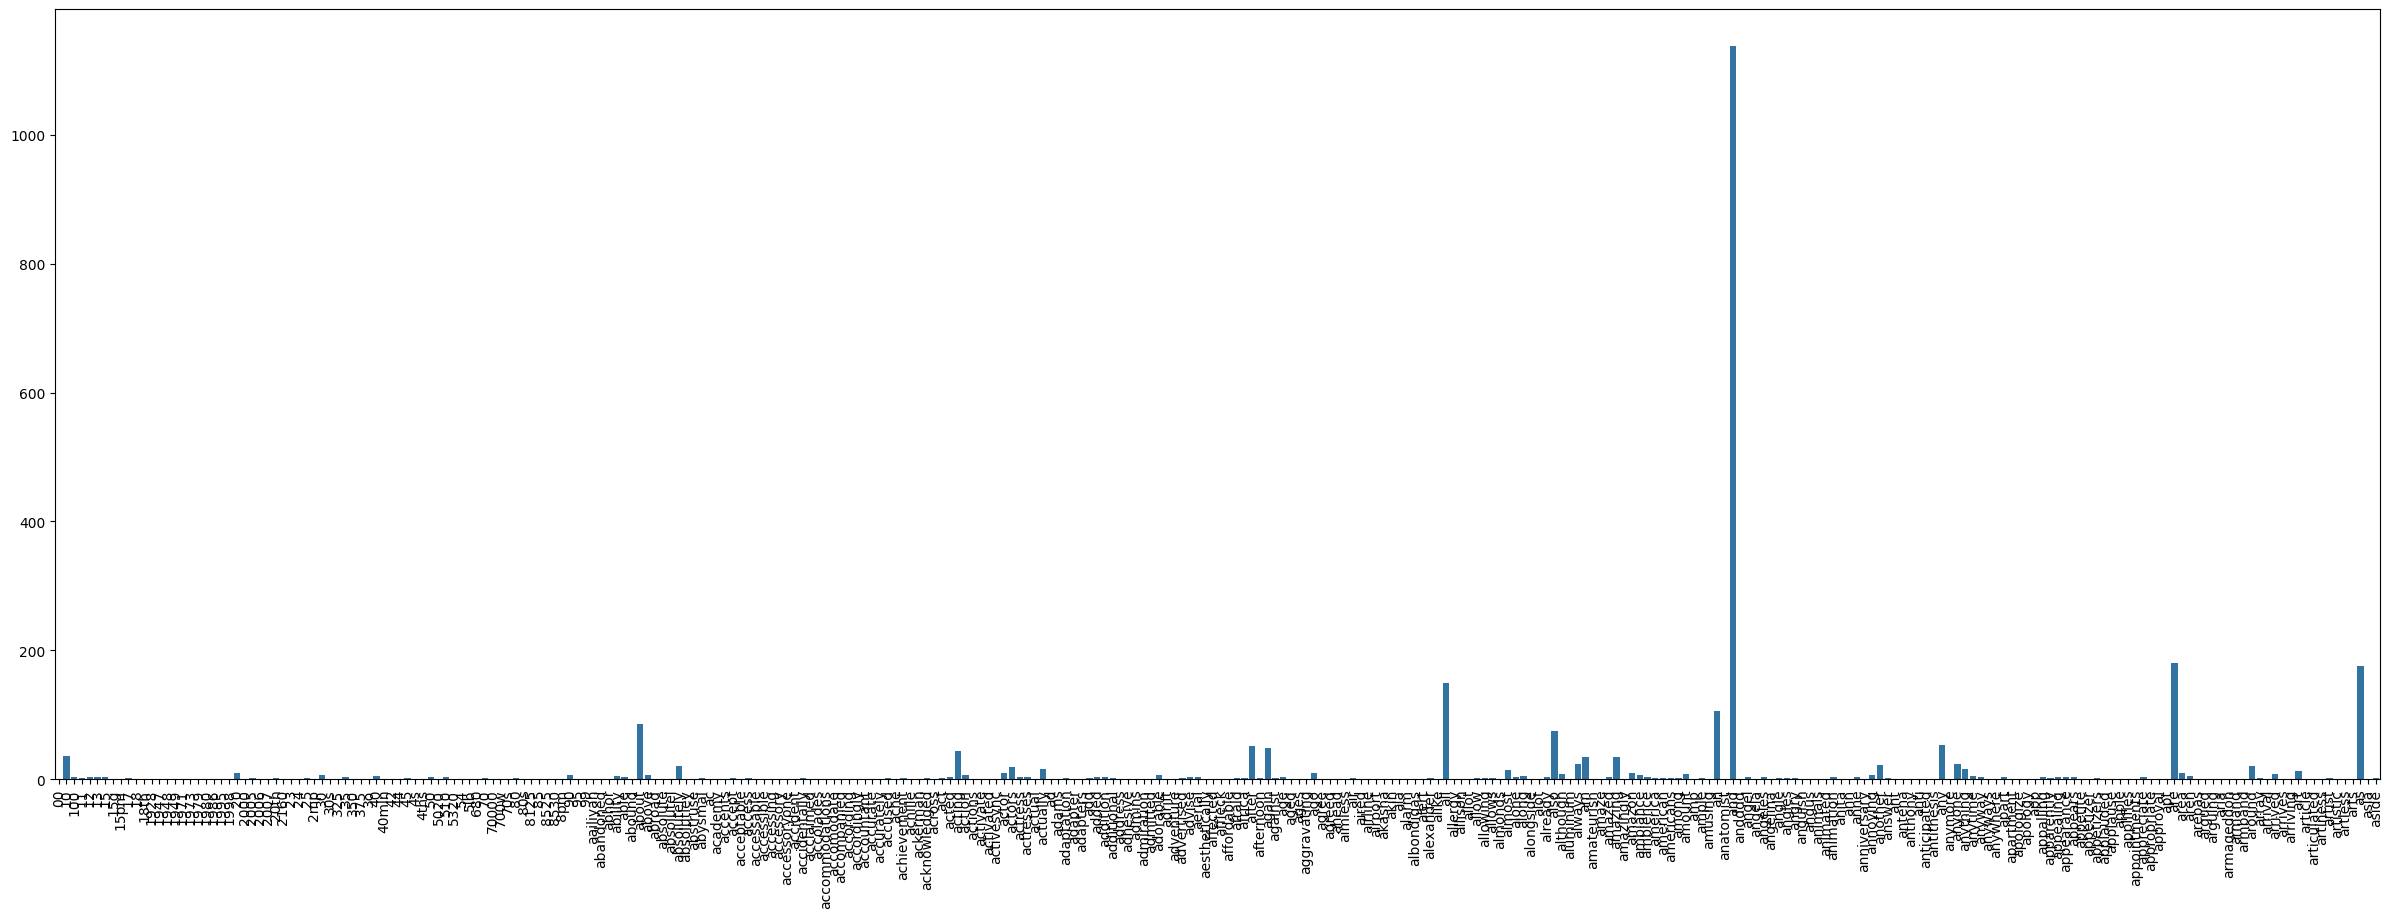

In [47]:
count_vect = CountVectorizer()
term_frequencies = []
data_counts = count_vect.fit_transform(data.sentance)
print(data_counts.shape[1])
for j in range(0,data_counts.shape[1]):
    term_frequencies.append(sum(data_counts[:,j].toarray()))
    
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]

plt.subplots(figsize=(30, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [48]:
term_frequencies = data_counts.sum(axis=0).A1  

fig = go.Figure(data=[
    go.Bar(
        x=count_vect.get_feature_names_out()[:300],
        y=term_frequencies[:300]
    )
])

fig.update_layout(
    title='Word Frequencies',
    xaxis_title='Word',
    yaxis_title='Frequency',
    width=2000,
    height=1000
)

fig.show()

<BarContainer object of 91 artists>

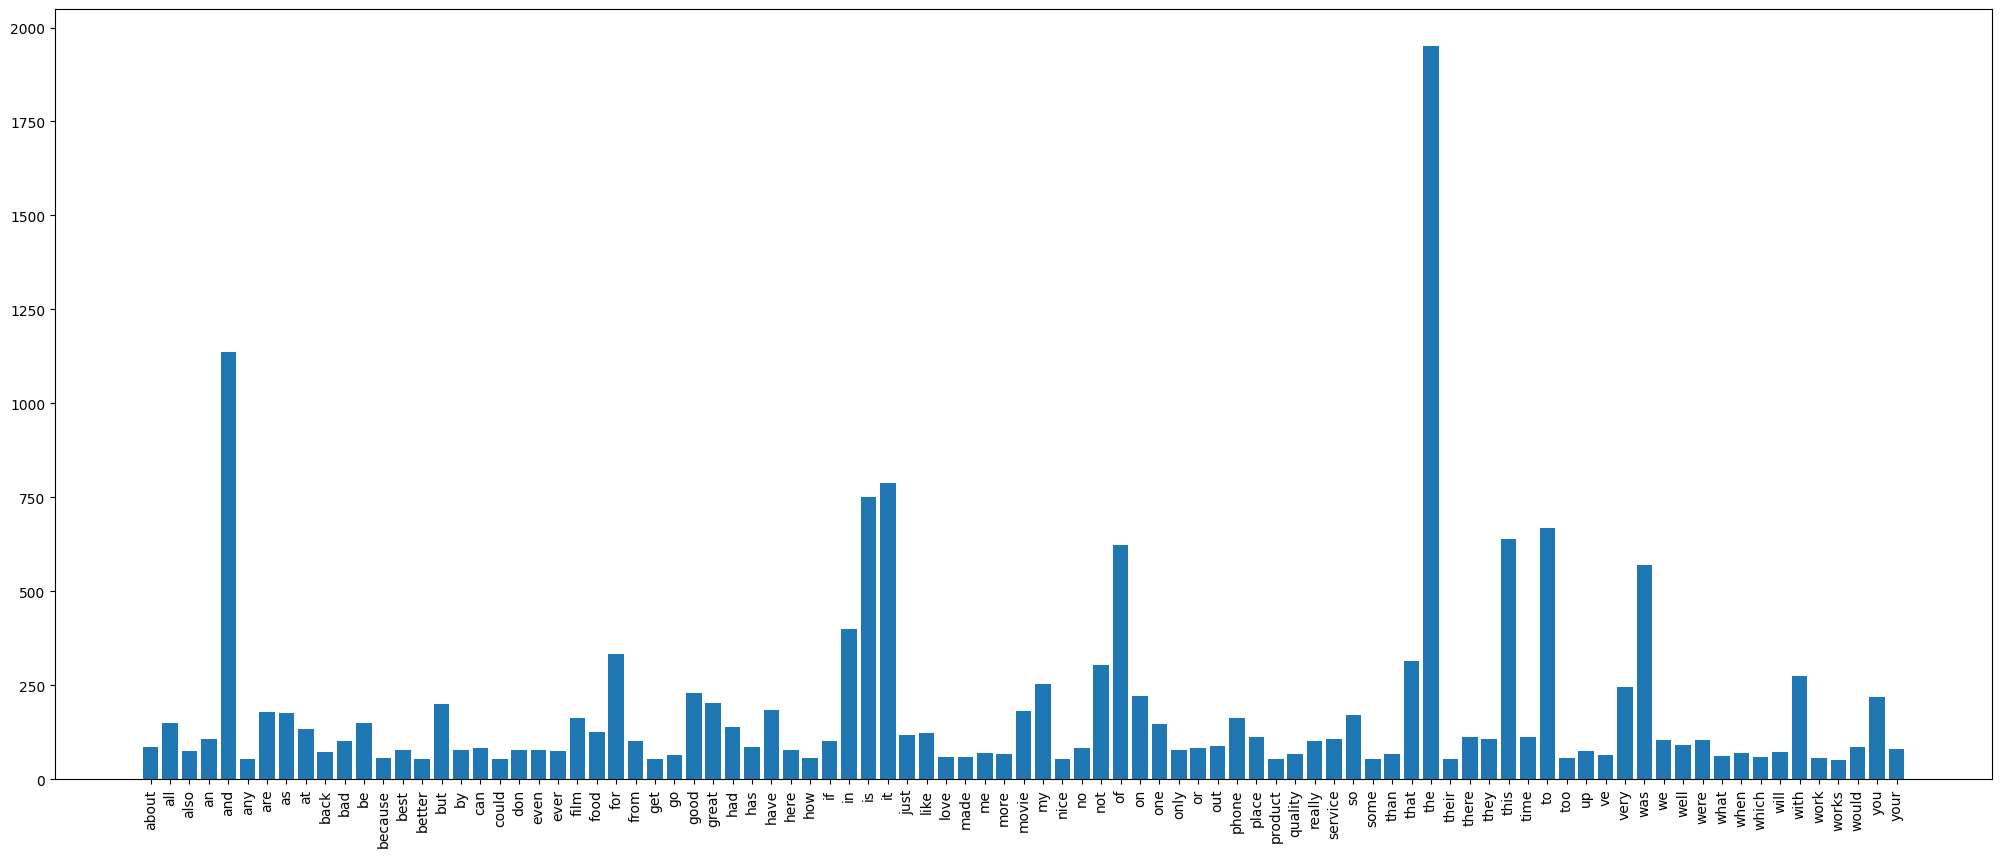

In [49]:
cv = CountVectorizer(max_features=1000) 

# Remove stop words
cv = CountVectorizer(stop_words='english')

# Filter low word frequency
cv = CountVectorizer(min_df=50)

data_counts = cv.fit_transform(data.sentance)
word_count = data_counts.sum(axis=0).A1

# Get vocabulary list
terms = cv.get_feature_names_out()

plt.figure(figsize=(25, 10))
plt.xticks(rotation=90)
plt.bar(terms, word_count)

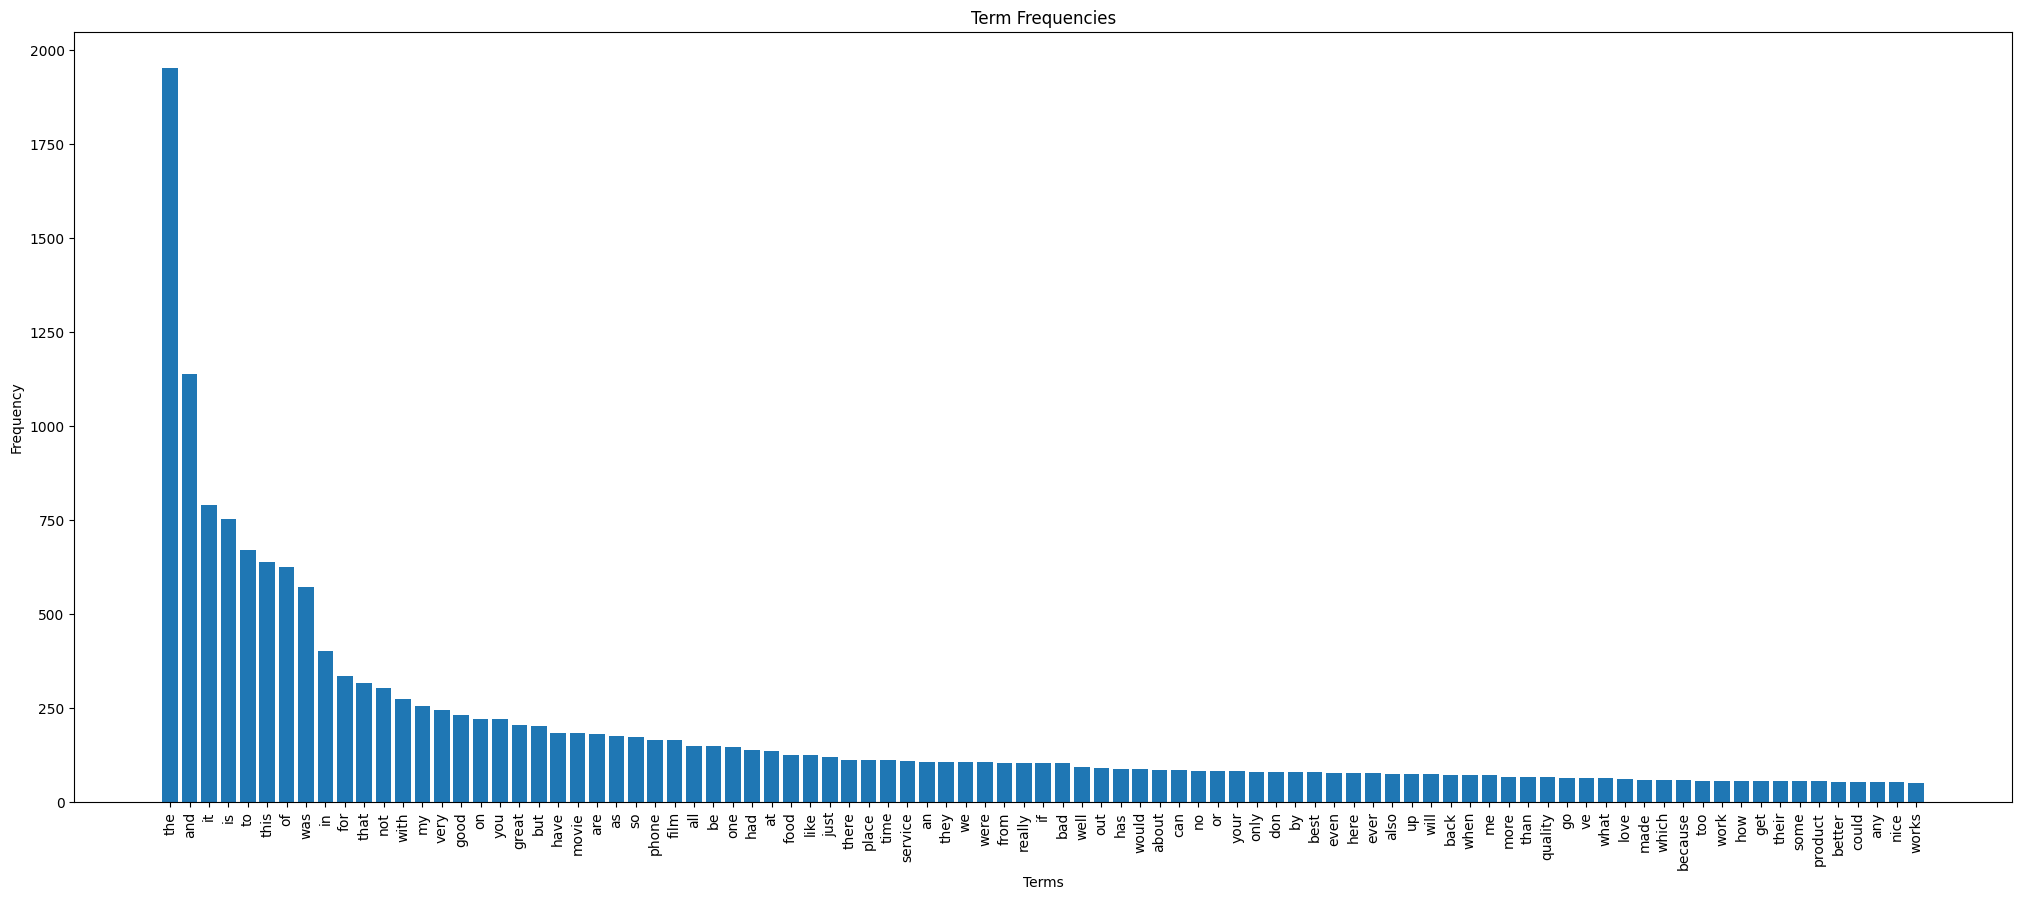

In [50]:
term_frequencies = data_counts.sum(axis=0).A1

term_frequencies_sorted = sorted(term_frequencies, reverse=True)  

indices = np.argsort(term_frequencies)[::-1]

terms_sorted = [terms[i] for i in indices]

plt.figure(figsize=(25, 10))
plt.bar(terms_sorted, term_frequencies_sorted)
plt.xticks(rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency') 
plt.title('Term Frequencies')
plt.show()

C:\Users\longy\AppData\Local\Temp\ipykernel_8164\1229567717.py:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0, '00'),
 Text(1, 0, '10'),
 Text(2, 0, '100'),
 Text(3, 0, '11'),
 Text(4, 0, '12'),
 Text(5, 0, '13'),
 Text(6, 0, '15'),
 Text(7, 0, '15g'),
 Text(8, 0, '15pm'),
 Text(9, 0, '17'),
 Text(10, 0, '18'),
 Text(11, 0, '18th'),
 Text(12, 0, '1928'),
 Text(13, 0, '1947'),
 Text(14, 0, '1948'),
 Text(15, 0, '1949'),
 Text(16, 0, '1971'),
 Text(17, 0, '1973'),
 Text(18, 0, '1979'),
 Text(19, 0, '1980'),
 Text(20, 0, '1986'),
 Text(21, 0, '1995'),
 Text(22, 0, '1998'),
 Text(23, 0, '20'),
 Text(24, 0, '2000'),
 Text(25, 0, '2005'),
 Text(26, 0, '2006'),
 Text(27, 0, '2007'),
 Text(28, 0, '20th'),
 Text(29, 0, '2160'),
 Text(30, 0, '23'),
 Text(31, 0, '24'),
 Text(32, 0, '25'),
 Text(33, 0, '2mp'),
 Text(34, 0, '30'),
 Text(35, 0, '30s'),
 Text(36, 0, '325'),
 Text(37, 0, '35'),
 Text(38, 0, '350'),
 Text(39, 0, '375'),
 Text(40, 0, '3o'),
 Text(41, 0, '40'),
 Text(42, 0, '40min'),
 Text(43, 0, '42'),
 Text(44, 0, '44'),
 Text(45, 0, '45'),
 Text(46, 0, '4s'),
 Text(47, 0, '4ths'),


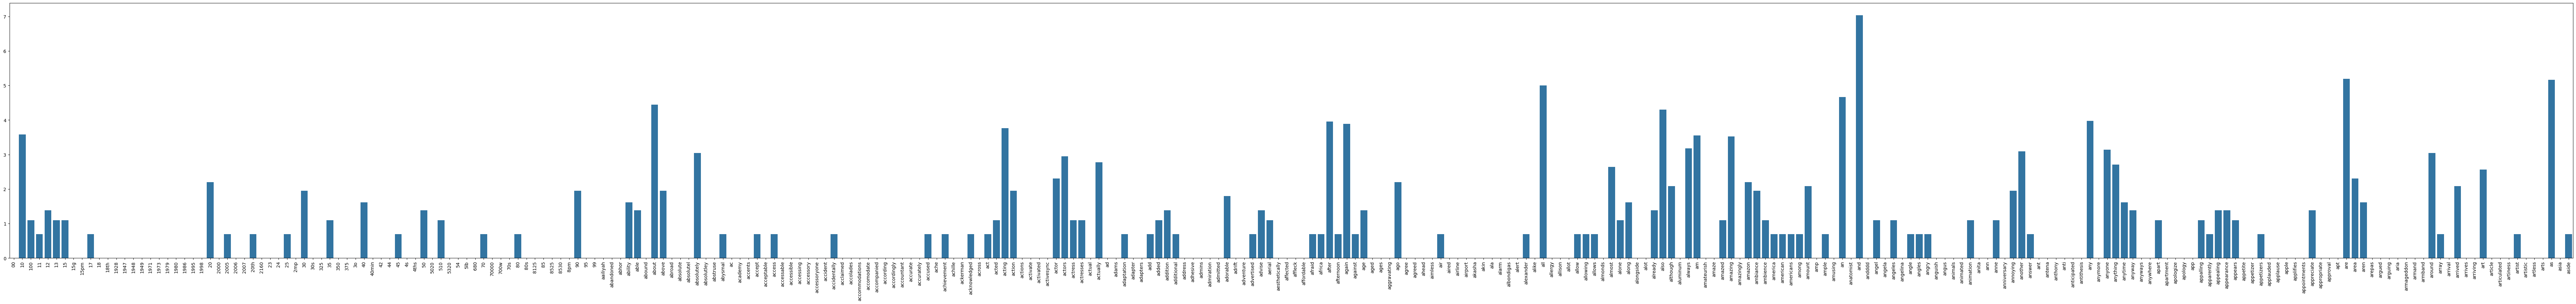

In [51]:
import math
count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentance) 
term_frequencies = data_counts.sum(axis=0).A1
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90)

### 3.6 Discretization and Binarization

In [52]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data["label"])
data['bin_category'] = mlb.transform(data['label']).tolist()

In [53]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(data['sentiment'])  
data['bin_sentiment_name'] = mlb.transform(data['sentiment']).tolist()
display(data)

sentance  label provider  \
0     So there is no way for me to plug it in here i...      0   amazon   
1                           Good case, Excellent value.      1   amazon   
2                                Great for the jawbone.      1   amazon   
3     Tied to charger for conversations lasting more...      0   amazon   
4                                     The mic is great.      1   amazon   
...                                                 ...    ...      ...   
2726  I think food should have flavor and texture an...      0     yelp   
2727                           Appetite instantly gone.      0     yelp   
2728  Overall I was not impressed and would not go b...      0     yelp   
2729  The whole experience was underwhelming, and I ...      0     yelp   
2730  Then, as if I hadn't wasted enough of my life ...      0     yelp   

     sentiment                                           unigrams  \
0     negative  [So, there, is, no, way, for, me, to, plug, it...   
1     positive               [Good, case, ,, Excellent, value, .]   
2     positive                      [Great, for, the, jawbone, .]   
3     negative  [Tied, to, charger, for, conversations, lastin...   
4     positive                           [The, mic, is, great, .]   
...        ...                                                ...   
2726  negative  [I, think, food, should, have, flavor, and, te...   
2727  negative                     [Appetite, instantly, gone, .]   
2728  negative  [Overall, I, was, not, impressed, and, would, ...   
2729  negative  [The, whole, experience, was, underwhelming, ,...   
2730  negative  [Then, ,, as, if, I, had, n't, wasted, enough,...   

     bin_category bin_sentiment_name  
0             [0]                [0]  
1             [1]                [1]  
2             [1]                [1]  
3             [0]                [0]  
4             [1]                [1]  
...           ...                ...  
2726          [0]                [0]  
2727          [0]                [0]  
2728          [0]                [0]  
2729          [0]                [0]  
2730          [0]                [0]  

[2731 rows x 7 columns]

# 4. Data Exploration

In [54]:
# We retrieve 3 sentences for a random record
sentance_to_transform_1 = []
random_record_1 = data.iloc[50]
random_record_1 = random_record_1['sentance']
sentance_to_transform_1.append(random_record_1)

sentance_to_transform_2 = []
random_record_2 = data.iloc[100]
random_record_2 = random_record_2['sentance']
sentance_to_transform_2.append(random_record_2)

sentance_to_transform_3 = []
random_record_3 = data.iloc[150]
random_record_3 = random_record_3['sentance']
sentance_to_transform_3.append(random_record_3)

In [55]:
print(sentance_to_transform_1)
print(sentance_to_transform_2)
print(sentance_to_transform_3)

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']


In [56]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
sentance_vector_count_1 = count_vect.transform(sentance_to_transform_1)
sentance_vector_count_2 = count_vect.transform(sentance_to_transform_2)
sentance_vector_count_3 = count_vect.transform(sentance_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
sentance_vector_count_1_bin = binarize(sentance_vector_count_1)
sentance_vector_count_2_bin = binarize(sentance_vector_count_2)
sentance_vector_count_3_bin = binarize(sentance_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(sentance_vector_count_1.todense())
print(sentance_vector_count_2.todense())
print(sentance_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(sentance_vector_count_1, sentance_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(sentance_vector_count_1, sentance_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(sentance_vector_count_2, sentance_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(sentance_vector_count_1, sentance_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(sentance_vector_count_2, sentance_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(sentance_vector_count_3, sentance_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


## Part three- Attempt the following tasks on **the new dataset**

### 1.Generate meaningful data visualizations

1.1 Sentiment distribution chart: 

Calculate the number of positive and negative sentiments, and display their distribution in a bar chart. This can intuitively reflect the emotional bias of the data set

sentiment
positive    1376
negative    1355
Name: count, dtype: int64


<Axes: title={'center': 'sentiment distribution'}, xlabel='sentiment'>

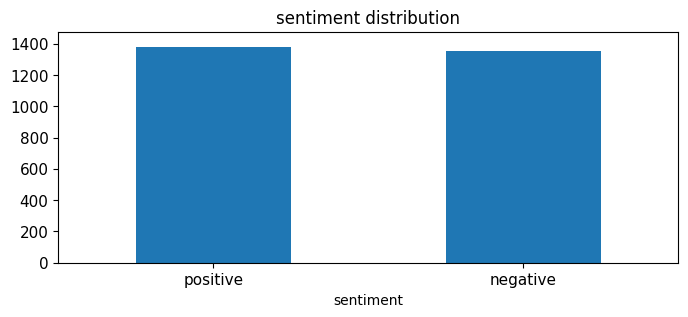

In [58]:
upper_bound1 = max(data.sentiment.value_counts() + 100)
print(data.sentiment.value_counts())
data.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'sentiment distribution',
                                    ylim = [0,upper_bound1],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

From the above table, we can see that the distribution of Positive Sentiment and Negative Sentiment in the data is almost half and half.

We can also randomly sample 1,000 pieces of data to observe the distribution of Positive Sentiment and Negative Sentiment in each data, and compare it with the distribution of the entire dataframe.

sentiment
positive    522
negative    478
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

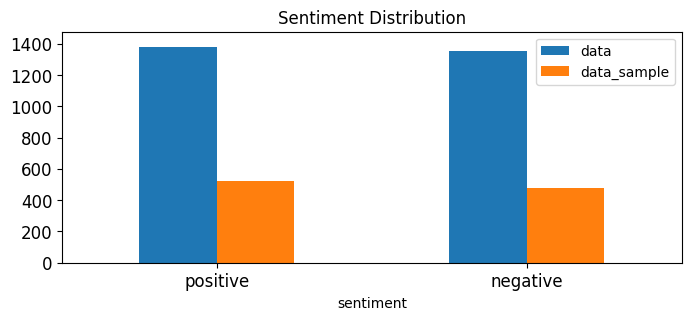

In [59]:
data_sample = data.sample(n=1000)
Merge_data_and_sample = pd.DataFrame({'data': data.sentiment.value_counts(), 'data_sample': data_sample.sentiment.value_counts()}) 
upper_bound3 = max(data.sentiment.value_counts()+100)
print(data_sample.sentiment.value_counts())

Merge_data_and_sample.plot(kind='bar',title = 'Sentiment Distribution',
                                           ylim = [0, upper_bound3], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

1.2 Source distribution chart: 
Calculate the quantity distribution of three providers: amazon, imdb, and yelp, and display it using a pie chart to shows the structure of the data source.
In addition, we can randomly sample 1,000  data and make a pie chart for comparison.

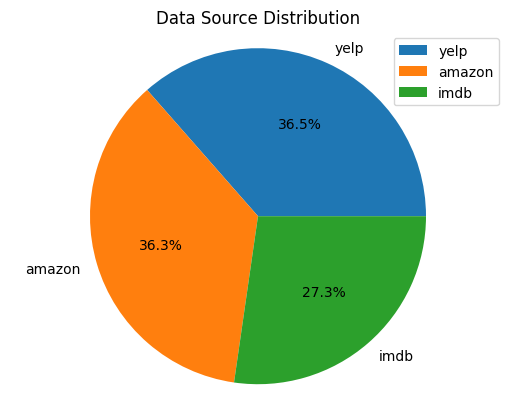

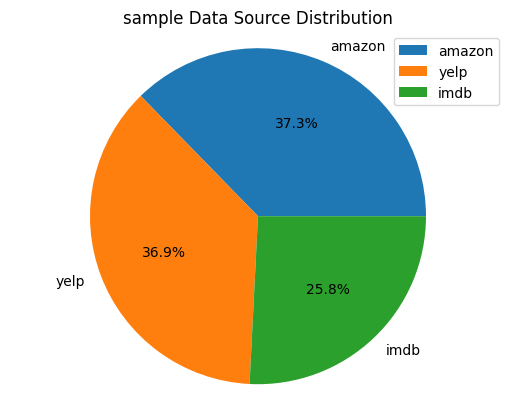

In [60]:
provider_count = data['provider'].value_counts()

plt.pie(provider_count, labels=provider_count.index, autopct='%1.1f%%')  
#autopct='%1.1f%%' Indicates that when a value is displayed on a pie chart, it will be automatically formatted into 1 integer and 1 decimal place,
# and a percentage symbol will be displayed.
plt.title("Data Source Distribution")
plt.legend()
plt.axis('equal') 

plt.show()

data_sample = data.sample(n=1000)
sample_provider_count = data_sample['provider'].value_counts()

plt.pie(sample_provider_count, labels=sample_provider_count.index, autopct='%1.1f%%') 
plt.title("sample Data Source Distribution")
plt.legend()
plt.axis('equal') 

plt.show()

Since the data provider attributes of the dataframe are evenly distributed, the distribution of the provider attributes of the sample data is also evenly distributed.

1.3 Sentiment-provider cross analysis:

 Use groupby grouping, calculate the number of positive and negative according to the provider grouping, and create a group diagram to show the distribution of each group. It can reflect emotional characteristics from different providers.

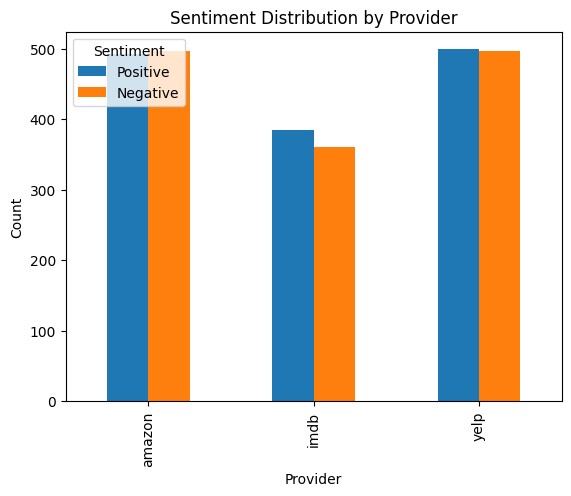

In [61]:
sentiment_by_provider = data.groupby(['provider', 'sentiment']).size()
sentiment_by_provider = sentiment_by_provider.unstack(level=1) #Expand the index hierarchy to make data easier to visualize.
sentiment_by_provider = sentiment_by_provider[["positive", "negative"]]
ax = sentiment_by_provider.plot(kind='bar')

ax.set_xlabel('Provider')
ax.set_ylabel('Count') 
ax.set_title('Sentiment Distribution by Provider')
ax.legend(title='Sentiment', loc='upper left', labels=['Positive', 'Negative'])

1.4 Extract all positive and negative unigrams to generate a word cloud. Visualize word frequency features of two emotions.

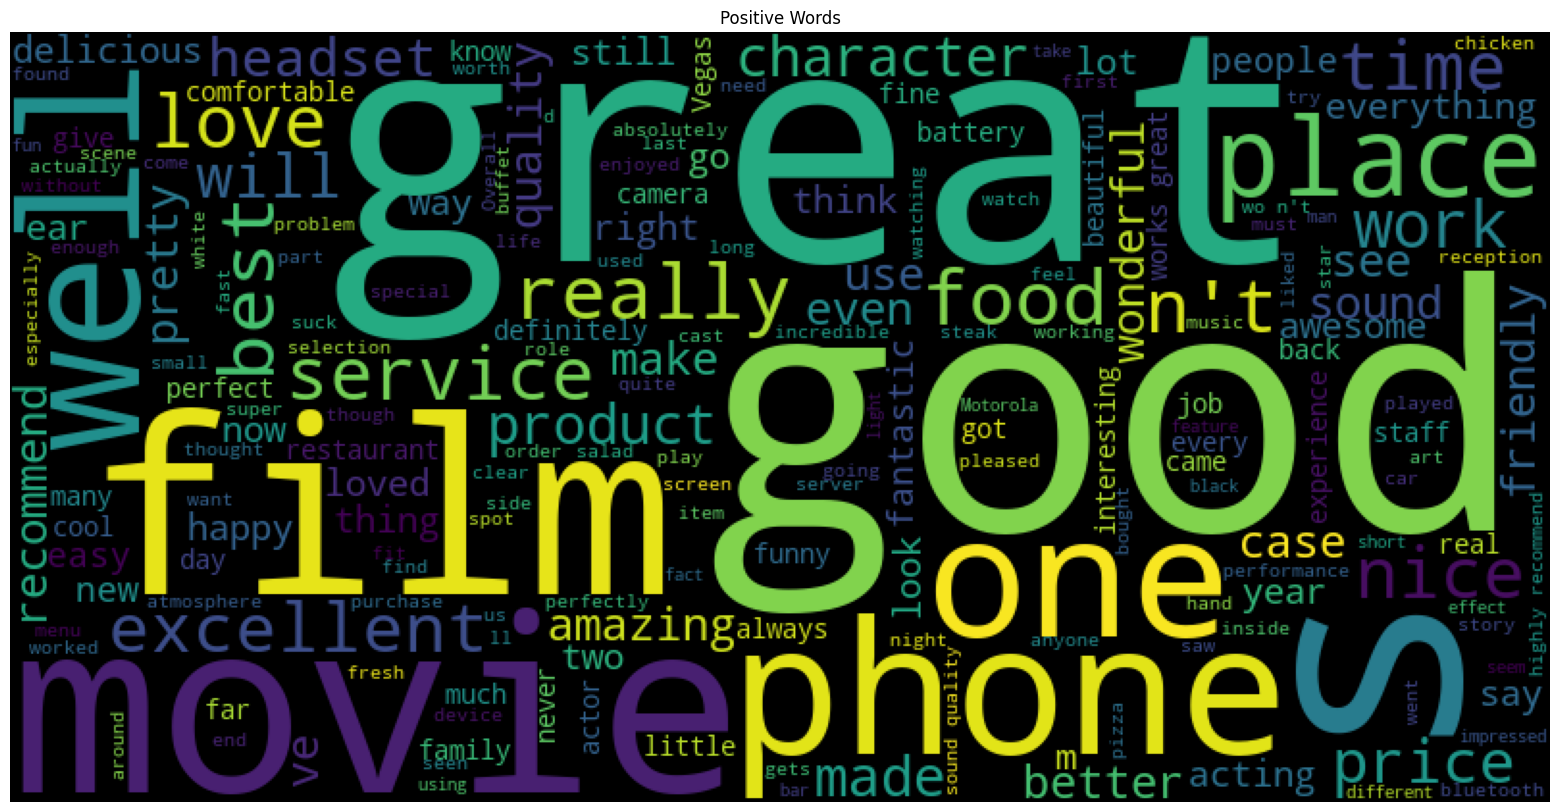

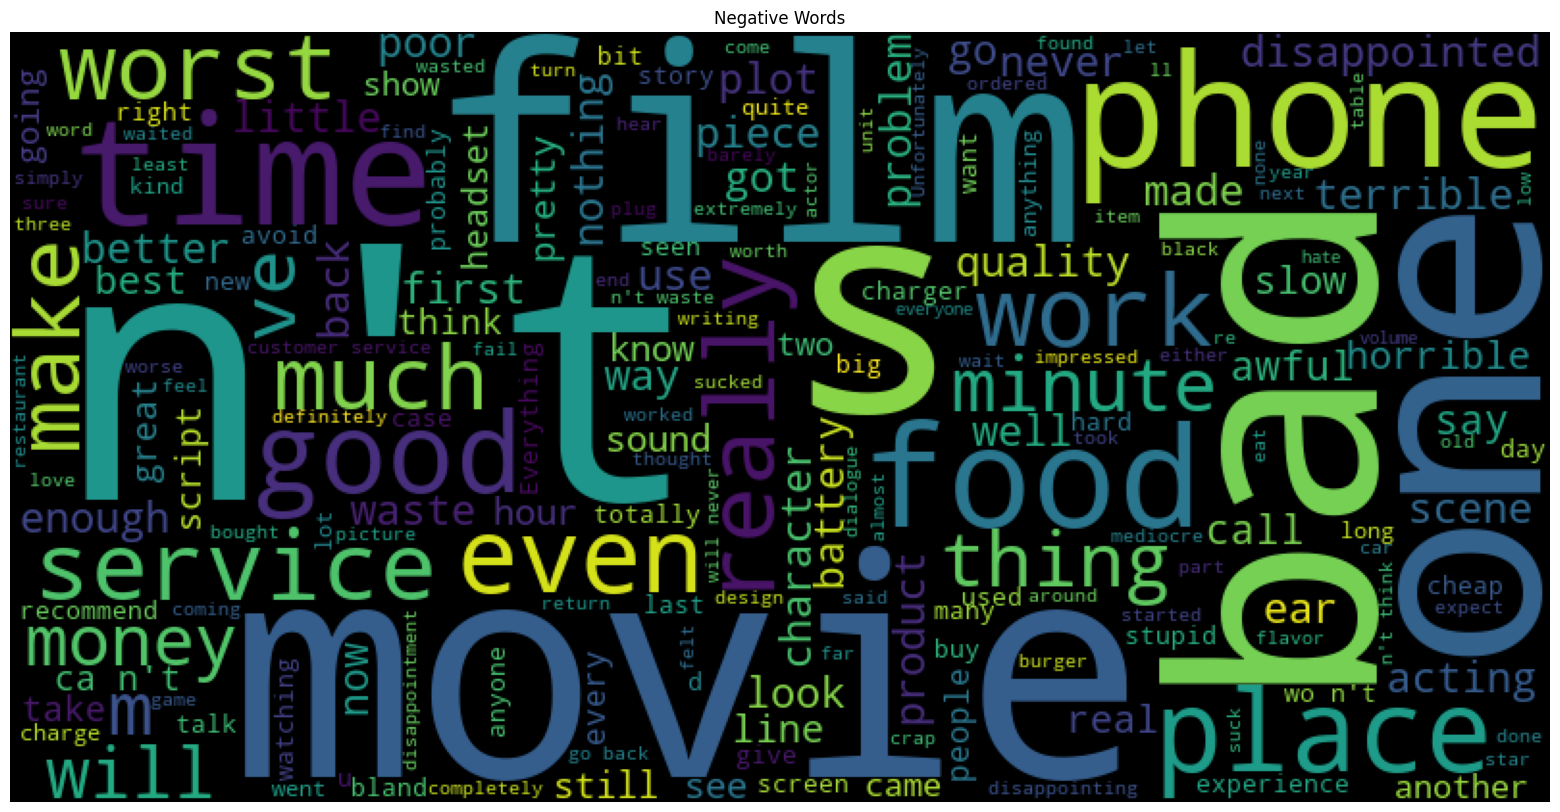

In [62]:
from wordcloud import WordCloud as WC

# Extract positive unigrams
pos_words = data[data['sentiment']=='positive']['unigrams'].sum() 

# Generate positive word cloud
pos_cloud = WC(width=800, height=400).generate(" ".join(pos_words))

# Draw positive word cloud
plt.figure(figsize=(25, 10))
plt.imshow(pos_cloud)
plt.axis('off')
plt.title('Positive Words')
plt.show()

# Extract negative unigrams
neg_words = data[data['sentiment']=='negative']['unigrams'].sum()

# Generate negative word cloud
neg_cloud = WC(width=800, height=400).generate(" ".join(neg_words))

# Draw negative word cloud
plt.figure(figsize=(25, 10))
plt.imshow(neg_cloud)
plt.axis('off')
plt.title('Negative Words')
plt.show()

1.5 word long tail bar chart: 

Select the top 1000 word features with the highest frequency, arrange them from high to low frequency, and delete word features with frequencies less than 75 to display their occurrence times in a bar chart.

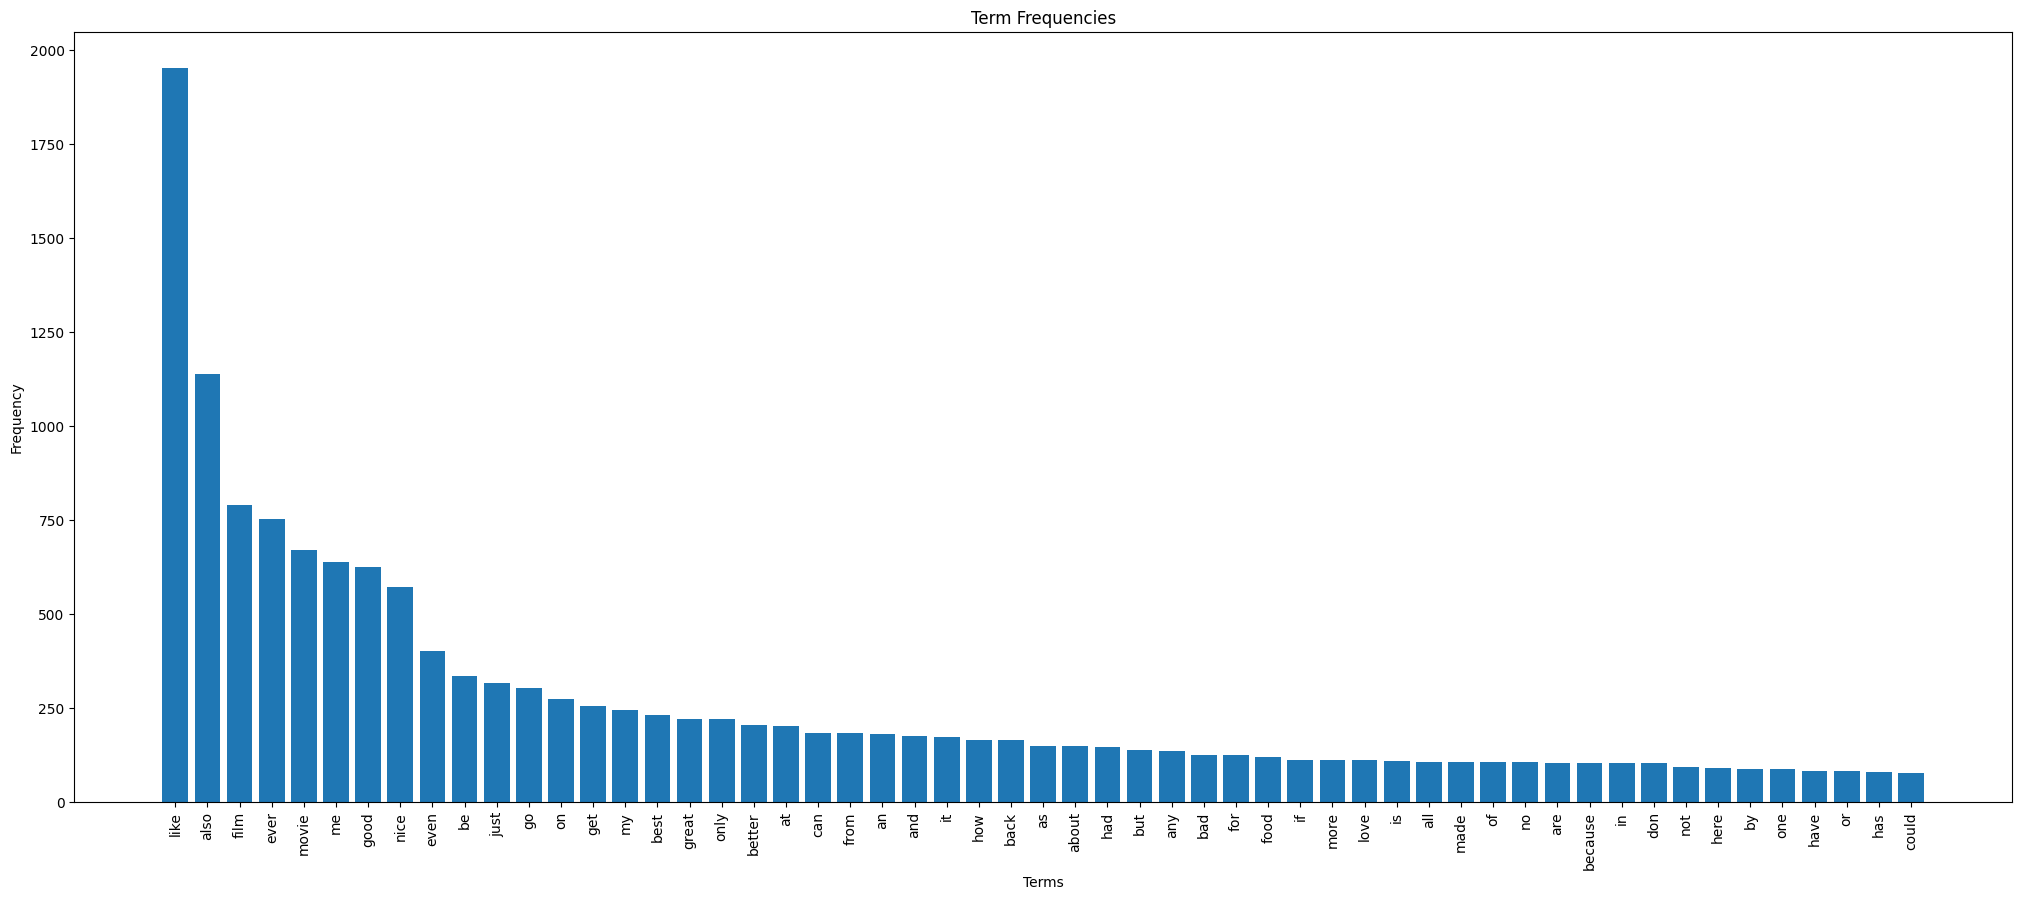

In [63]:
cv = CountVectorizer(max_features=1000) 

# Remove stop words
cv = CountVectorizer(stop_words='english')

# Filter low word frequency
cv = CountVectorizer(min_df=75)

data_counts = cv.fit_transform(data.sentance)

term_frequencies = data_counts.sum(axis=0).A1

term_frequencies_sorted = sorted(term_frequencies, reverse=True)  

indices = np.argsort(term_frequencies)[::-1]

terms_sorted = [terms[i] for i in indices]

plt.figure(figsize=(25, 10))
plt.bar(terms_sorted, term_frequencies_sorted)
plt.xticks(rotation=90)
plt.xlabel('Terms')
plt.ylabel('Frequency') 
plt.title('Term Frequencies')
plt.show()

### 2.Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the list of unigrams into word strings
corpus = data['unigrams'].apply(lambda x: ' '.join(x)) 

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()

# Generate TF-IDF matrix
data_TfidfVector = vectorizer.fit_transform(corpus) 
print(data_TfidfVector)

# Get vocabulary list
vocab = vectorizer.get_feature_names_out()
display(vocab)

  (0, 1011)	0.397440604316733
  (0, 646)	0.2255304803459082
  (0, 1977)	0.23062492932674278
  (0, 4784)	0.3304097450707499
  (0, 4826)	0.2734187773692525
  (0, 4522)	0.08805226050033835
  (0, 2149)	0.2209219906727539
  (0, 2305)	0.3008176985216312
  (0, 2422)	0.12092830832271481
  (0, 3378)	0.30693420699224405
  (0, 4600)	0.12773778917278295
  (0, 2799)	0.2283755682187423
  (0, 1824)	0.1561404925347713
  (0, 4977)	0.24798083774375135
  (0, 3034)	0.2235014045579166
  (0, 2418)	0.12205283677638093
  (0, 4536)	0.21025818667676616
  (0, 4151)	0.18647368560383332
  (1, 4852)	0.6342135992620657
  (1, 1598)	0.472269140255879
  (1, 711)	0.5115101511401507
  (1, 1988)	0.33629203819538883
  (2, 2439)	0.8212743335641912
  (2, 2017)	0.40232185992144925
  (2, 4522)	0.1987085988818777
  :	:
  (2730, 1382)	0.3010054548749411
  (2730, 5098)	0.3010054548749411
  (2730, 3428)	0.3010054548749411
  (2730, 3848)	0.2756222226902448
  (2730, 587)	0.2502389905055485
  (2730, 4621)	0.2324595665085899
  (2730, 

array(['00', '10', '100', ..., 'zillion', 'zombie', 'zombiez'],
      dtype=object)

### 3.Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.

In [65]:
from sklearn.naive_bayes import MultinomialNB ,BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

TF-IDF features

In [66]:
X_train, X_test, y_train, y_test = train_test_split(data['sentance'], data['label'], test_size=0.25) 
def TFIDF_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test,show=True):
    # TF-IDF vectorization
    X_train = vectorizer.fit_transform(X_train)
    X_test = vectorizer.transform(X_test)
    # Train Naive Bayes model
    Mnb = MultinomialNB()
    Mnb.fit(X_train, y_train)
    Bnb=BernoulliNB()
    Bnb.fit(X_train, y_train)
    # Make predictions
    y_predMnb = Mnb.predict(X_test)
    y_predBnb = Bnb.predict(X_test)
    if(show):
        display(y_predMnb[:10])
        display(y_predBnb[:10])
        # Evaluate accuracy
        print('TF-IDF features Accuracy Mnb:', accuracy_score(y_test, y_predMnb))
        print('TF-IDF features Accuracy: Bnb', accuracy_score(y_test, y_predBnb))
    return accuracy_score(y_test, y_predMnb),accuracy_score(y_test, y_predBnb)
    
TFIDF_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test)

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

TF-IDF features Accuracy Mnb: 0.821376281112738
TF-IDF features Accuracy: Bnb 0.7906295754026355


(0.821376281112738, 0.7906295754026355)

Word frequency features

In [67]:
# Convert the list of unigrams into word strings 
corpus = data['unigrams'].apply(lambda x: ' '.join(x))

# Initialize CountVectorizer (instead of TfidfVectorizer)
vectorizer = CountVectorizer() 

# Generate word frequency matrix (instead of TF-IDF matrix)
data_wordfreq = vectorizer.fit_transform(corpus)

X_train, X_test, y_train, y_test = train_test_split(data['sentance'], data['label'], test_size=0.25)

def Word_frequency_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test,show=True):
    # Word frequency vectorization 
    X_train = vectorizer.fit_transform(X_train)  
    X_test = vectorizer.transform(X_test)

    # Train Naive Bayes model
    Mnb = MultinomialNB()
    Mnb.fit(X_train, y_train)

    Bnb = BernoulliNB()
    Bnb.fit(X_train, y_train)

    # Make predictions
    y_predMnb = Mnb.predict(X_test)
    y_predBnb = Bnb.predict(X_test)

    
    if(show):
        display(y_predMnb[:10])
        display(y_predBnb[:10])
        # Evaluate accuracy
        print('Word frequency features Accuracy Mnb:', accuracy_score(y_test, y_predMnb))
        print('Word_frequency features Accuracy: Bnb', accuracy_score(y_test, y_predBnb))
    return accuracy_score(y_test, y_predMnb),accuracy_score(y_test, y_predBnb)
    
Word_frequency_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test)


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

Word frequency features Accuracy Mnb: 0.808199121522694
Word_frequency features Accuracy: Bnb 0.7994143484626647


(0.808199121522694, 0.7994143484626647)

Comparison of TF-IDF features and word frequency features and MultinomialNB ,BernoulliNB

In [68]:
TFIDF_Mnb_Accur=[None]*100
TFIDF_Bnb_Accur=[None]*100
Word_frequency_Mnb_Accur=[None]*100
Word_frequency_Bnb_Accur=[None]*100




for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(data['sentance'], data['label'], test_size=0.4)
    TFIDF_Mnb_Accur[i],TFIDF_Bnb_Accur[i]=TFIDF_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test,show=False)
    Word_frequency_Mnb_Accur[i],Word_frequency_Bnb_Accur[i]=Word_frequency_features_simple_Naive_Bayes_classifier(X_train, X_test, y_train, y_test,show=False)


print('TF-IDF features MultinomialNB Average Accuracy: ', np.mean(TFIDF_Mnb_Accur))
print('TF-IDF features BernoulliNB Average Accuracy:   ', np.mean(TFIDF_Bnb_Accur))
print('Word frequency features MultinomialNB Average Accuracy:', np.mean(Word_frequency_Mnb_Accur))
print('Word_frequency features BernoulliNB Average Accuracy:  ', np.mean(Word_frequency_Bnb_Accur))

TF-IDF features MultinomialNB Average Accuracy:  0.7978316559926807
TF-IDF features BernoulliNB Average Accuracy:    0.7939707227813357
Word frequency features MultinomialNB Average Accuracy: 0.7978316559926807
Word_frequency features BernoulliNB Average Accuracy:   0.7939707227813357


Perhaps because the amount of data is not large enough, the prediction results of the simple Naive Bayes classifier of TF-IDF features and Word frequency features are almost exactly the same, so the accuracy_score is also almost the same.
It is worth noting that the accuracy of MultinomialNB is slightly higher than BernoulliNB in ​​almost every test result.

## Part four-There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

From the runtimes of each program block, we can observe:

1. Loading data from the network or python packages takes more time. If we can make the data local, the data loading time will be greatly reduced.
2. Since datasets like fetch_20newsgroups are very large, even simple O(n) for loops can become very time consuming. Therefore, when analyzing data, it's best to avoid loops whenever possible.
3. Feature extraction processes like CountVectorizer() scan the texts to build a word frequency dictionary and generate the matrix. Thus with large texts, the extraction process will be slower. We can add parameters to extract fewer less important features, reducing dimensionality to speed up processing.
4. Converting large sparse matrices to dense NumPy arrays can be time consuming if the feature dimension is high. Randomly sampling only representative portions of the data can help reduce the data size and time costs.